# "visit with us" - travel package purchase prediction - ensemble techniques

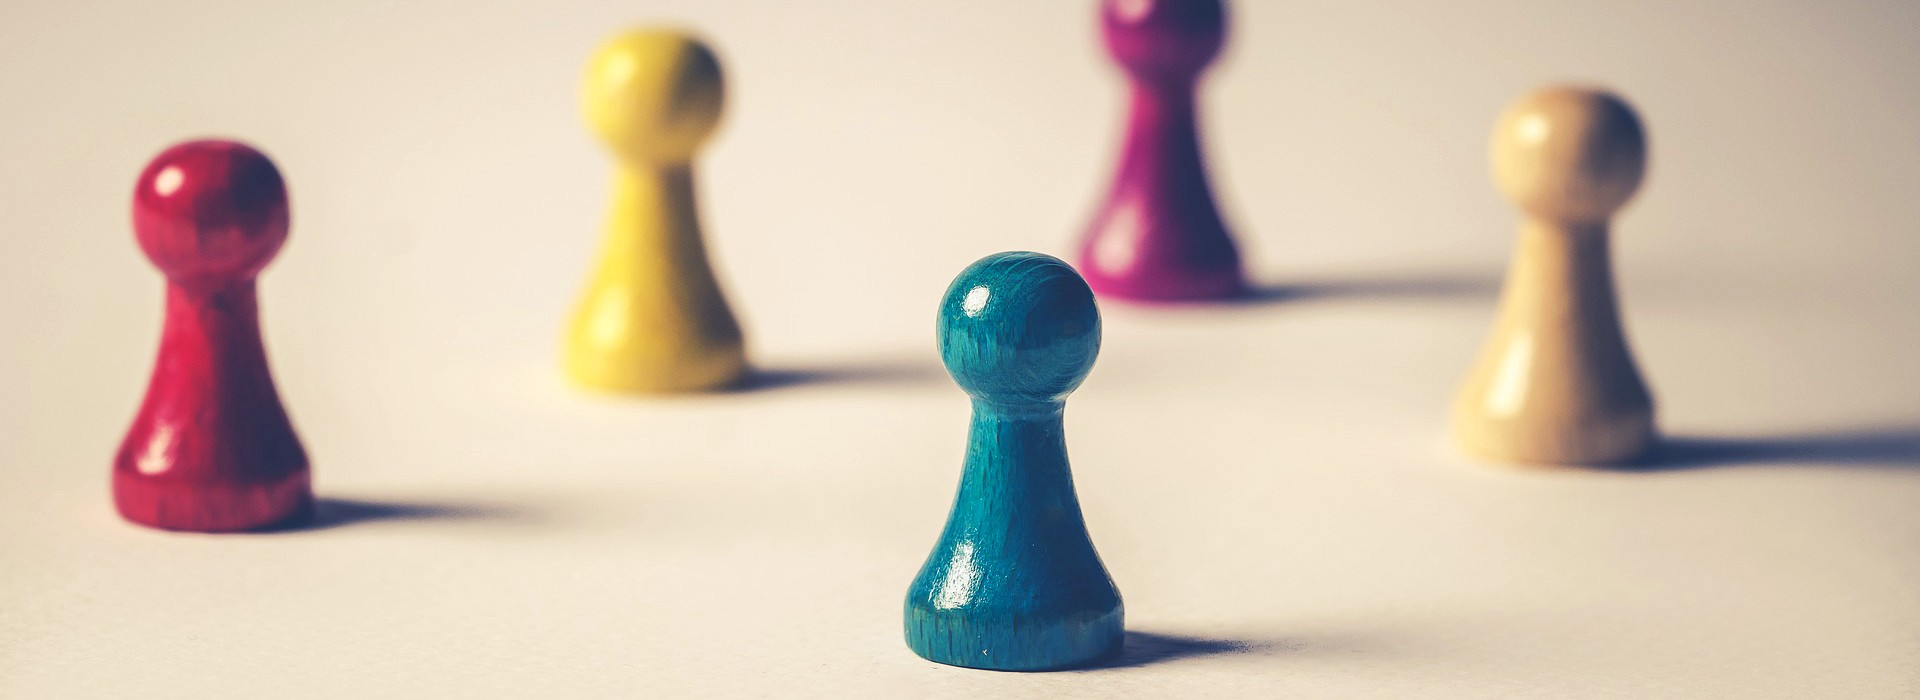

## Context:

* **Visit with us** a tourism company, wants to build a viable business model that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. 

* One of the ways to expand the customer base is to introduce a new offering of packages.

* Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

* However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

* The company is now planning to launch a new product i.e. **Wellness Tourism Package**. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one"s sense of well-being.

## Objective:

To harness the available data of existing and potential customers to make the marketing expenditure more efficient and to predict which customer is more likely to purchase the newly introduced travel package.

## Key questions to be answered:

1. What are the key variables in identifying potential customers for the travel packages?
2. What are the different characteristics of the existing customers?
3. What is the most important metric for the model and possible improvements using tuning?

## Data Dictionary

### Customer details:
1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 
1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Import required libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn import metrics

# libraries to build Linear Regression Model
from sklearn.linear_model import LogisticRegression

# libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
)

# libraries to build xgboost model
from xgboost import XGBClassifier

# library for stacking classifier
from sklearn.ensemble import StackingClassifier

# to tune different models
from sklearn.model_selection import GridSearchCV, train_test_split

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)
 

<IPython.core.display.Javascript object>

## Define all required functions

In [2]:
# histogram and boxplot for the feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")
    plt.show()  # show the plot

# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    if v_ticks is True:
        plt.xticks(rotation=90)
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
# to plot confusion matrix
def draw_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# calculate different metric scores of the model - Accuracy, Recall, F1 and Precision
def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list=[] 
    
    # predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    # recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    # precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    # f1_score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    # populate the score_list 
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
    return score_list # returning the list with train and test scores
    

<IPython.core.display.Javascript object>

## Load the dataset

In [3]:
# load the file using excel. There are two sheets in the excel. Load the Tourism sheet
df = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

# back up data to preserve the initial version for reference
df_back = df.copy()

<IPython.core.display.Javascript object>

## Understand the data

### Check the shape of data

In [4]:
# print the data set information as number of rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 4888 rows and 20 columns.


<IPython.core.display.Javascript object>

### Check the dataset information

In [5]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

**Observations:**

1. TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation are object type columns but contain categorical information. We will convert these columns to Category type.
2. PreferredPropertyStar, NumberOfChildrenVisiting, NumberOfPersonVisiting, PitchSatisfactionScore, NumberOfFollowups, OwnCar, Passport, CityTier and ProdTaken are numerical columns but contain categorical information. We will covert these columns to Category type.

### Check the sample data

In [6]:
# setting the random seed via np.random.seed to get the same random results every time
np.random.seed(1)

# also look at random 10 sample rows
df.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


<IPython.core.display.Javascript object>

## Data pre-processing

### Convert the Categorical columns to Category Datatype

In [7]:
# creating list of category columns that are not object type
cat_cols = ["CityTier","ProdTaken","NumberOfPersonVisiting","NumberOfChildrenVisiting","PreferredPropertyStar","Passport","PitchSatisfactionScore","OwnCar"]
df[cat_cols] = df[cat_cols].astype("category")

# selecting all object datatypes and converting to category
cols = df.select_dtypes(["object"])
for i in cols.columns:
    df[i] = df[i].astype("category")

# check the dataset for updated datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

<IPython.core.display.Javascript object>

**Observations:**

The datatype of Categorical columns is fixed now

### Check the missing values

In [8]:
# check number of null records
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**

1. There are 7 columns with null values.
2. Age and MonthlyIncome are usually linked to Designation and since there are no missing values in Designation we can use it as a basis to update the missing values in Age and MonthlyIncome.
3. NumberOfChildrenVisiting, NumberOfTrips, PreferredPropertyStar, NumberOfFollowups, DurationOfPitch can be populated with Median values of the column.
4. For TypeofContact we will have to impute values based on available data in the column

### Treat Age and MonthlyIncome for missing values

In [9]:
# replace the missing values with median income w.r.t the customer"s designation
df["MonthlyIncome"] = df.groupby(["Designation"])["MonthlyIncome"].transform(lambda x: x.fillna(x.median()))
df["Age"] = df.groupby(["Designation"])["Age"].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

### Treat other numerical columns for missing values

In [10]:
# create list of numerical columns
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()

# remove Age and MonthlyIncome as we have already treated these columns
missing_numerical.remove("MonthlyIncome")
missing_numerical.remove("Age")

# function for replacing with the Median value of the attributes
medianFiller = lambda x: x.fillna(x.median()) 

# apply the function
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

<IPython.core.display.Javascript object>

### Check the data for category columns

In [11]:
#create a list of categorical columns
cat_cols =  df.select_dtypes(["category"])

#get the valuecounts
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print("-"*50)
    print("\n")

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------


3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------


3.0    

<IPython.core.display.Javascript object>

**Observations:**

1. In the Gender column, we have an error value Fe Male. We will treat this as an data entry issue and replace it to Female.
2. Self Inquiry is the most preffered in TypeofContact feature.
3. 3.0 is the highest property rating
4. And 1.0 is the highest value for the NumberOfChildrenVisiting column.
5. Hence we will replace the missing values in the above columns accordingly

### Treat the other columns for missing values

In [12]:
# treating missing values in remaining categorical variables
df["TypeofContact"] = df["TypeofContact"].fillna("Self Enquiry")
df["NumberOfChildrenVisiting"] = df["NumberOfChildrenVisiting"].fillna(1.0)
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].fillna(3.0)

<IPython.core.display.Javascript object>

### Treat the error in Gender column

In [13]:
# treating error
df.Gender = df.Gender.replace("Fe Male","Female")

# verify the update
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

**Observations:**

The error in data is resolved now

### Verify the missing value treatment

In [14]:
# count of null records
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**

All the null values are treated now

## Data verification

### Summary of numerical columns

In [15]:
# summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4888.0,37.429828,9.149822,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.00,13.0,19.00,127.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
MonthlyIncome,4888.0,23546.843903,5266.279293,1000.0,20485.00,22413.5,25424.75,98678.0


<IPython.core.display.Javascript object>

### Summary of categorical columns

In [16]:
# summary of categorical columns
df.describe(include="category").T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.0,3.0,3.0,3019.0
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466


<IPython.core.display.Javascript object>

**Observations:**
1. Self Inquiry is the most preffered Type of Contact
2. ProdTaken : There is heavy imbalance in this column where atleast 80% customers did not purchase any product
3. CityTier : Most customers are from Tier 1
4. Occupation : Most customers earn a salary
5. Gender : Male customers are slightly higher than Female Customers
6. NoOfPersonsVisting: Most customers plan to take atleast 3 additional persons with them in the trip
7. ProductPitched : Basic is the popular product
8. MaritalStatus : Most customers are married
9. Passport : Most customers dont have a passport
10. PitchSatisfactionScore : Most customers have rated 3.0 
11. OwnCar: Most customers own a car
12. NumberofChildrenVisting : Most customers plan to take atleast 1 child under five with them for the trip.
13. Designation : Most customers belong to Executive designation

## Univariate Analysis

### CustomerID

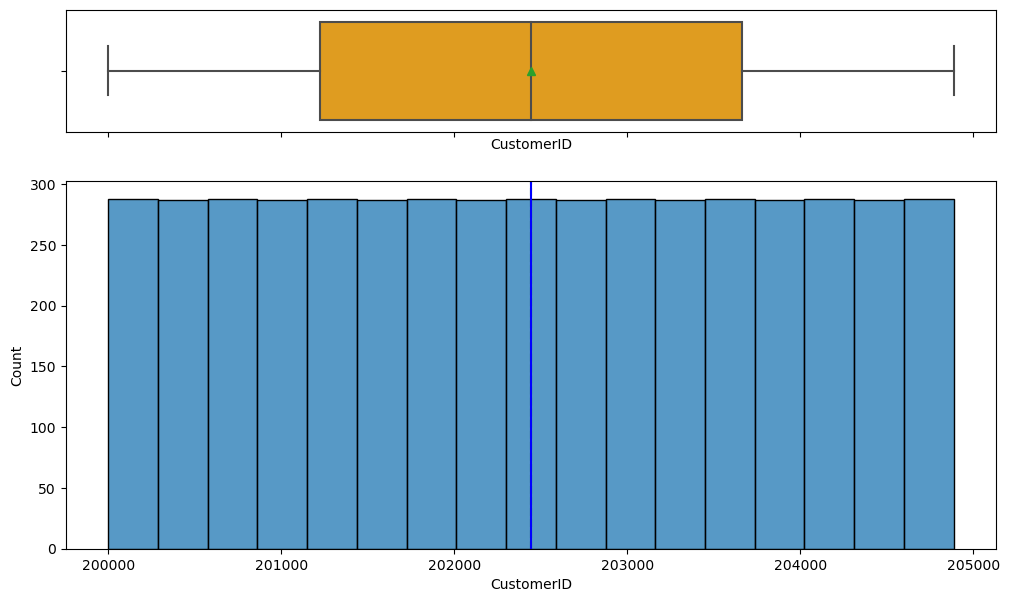

<IPython.core.display.Javascript object>

In [17]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"CustomerID")   

**Observations:**

1. CustomerID shows balanced data as it is sequential tracking number.
2. CutomerID is only for identifying the customer record.
3. We will not use this column in model building.

### ProdTaken - Target Variable

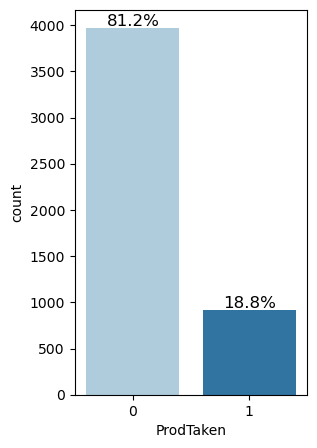

<IPython.core.display.Javascript object>

In [18]:
# use label_barplot function to plot the graph
labeled_barplot(df,"ProdTaken", True, False) 

**Observations:**

We see that only 18.8% of the total customers purchased any of the travel package.The plot shows heavy imbalance in the dataset.

### Age

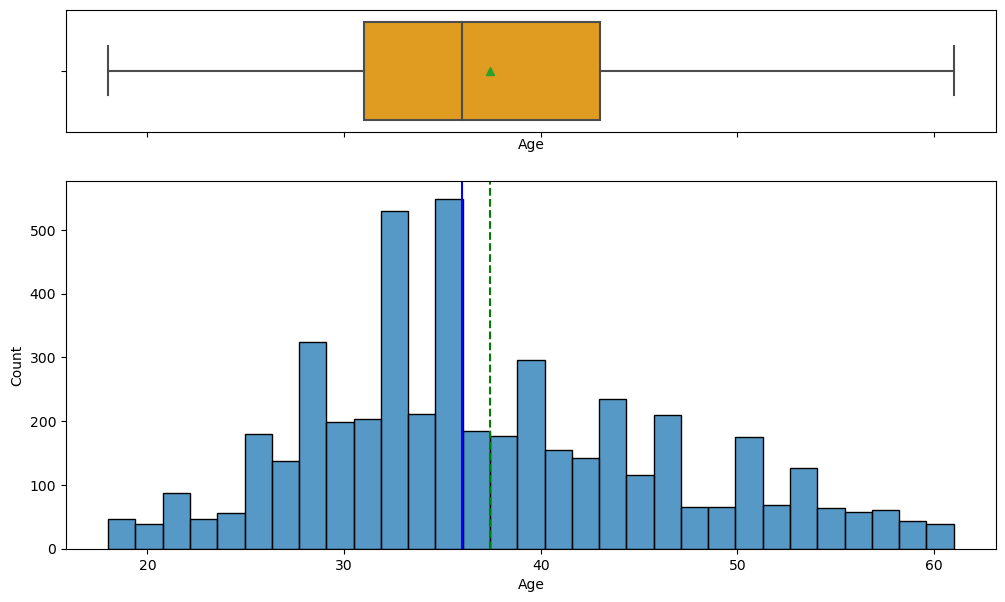

<IPython.core.display.Javascript object>

In [19]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"Age") 

**Observations:**

Age variable is almost normally distributed with no outliers. we see that most customers are in the age brackets 30- 45 yrs.

### TypeofContact

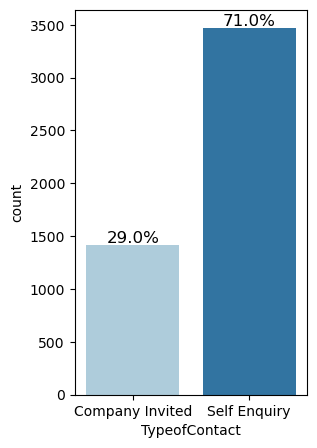

<IPython.core.display.Javascript object>

In [20]:
# use label_barplot function to plot the graph
labeled_barplot(df,"TypeofContact",True,False) 

**Observations:**

Self-Enquiry is the most preferred contact method by the customers at 71%.

### CityTier

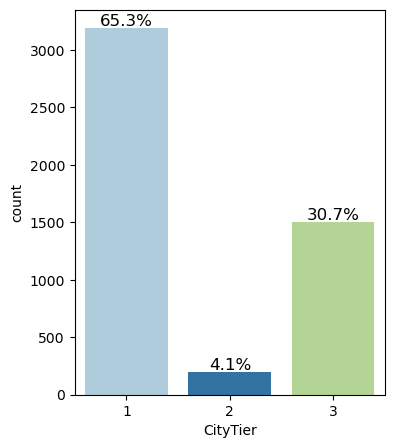

<IPython.core.display.Javascript object>

In [21]:
# use label_barplot function to plot the graph
labeled_barplot(df,"CityTier",True,False) 

**Observations:**

65.3% of customers are from Tier 1 cities and Tier3 cities comes second at 30.7%.

### DurationOfPitch

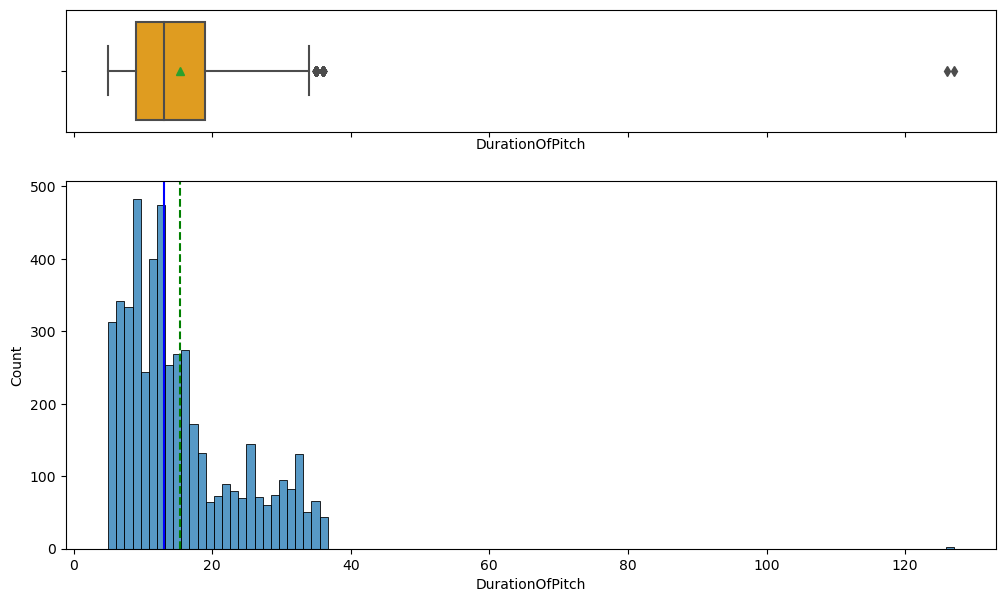

<IPython.core.display.Javascript object>

In [22]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"DurationOfPitch") 

**Observations:**
1. DurationofPitch is slightly right-skewed.
2. We see that most customer"s pitch duration was under 20 mins. 
3. We also see few outliers at 40 mins and at 120+ mins. 

### Occupation

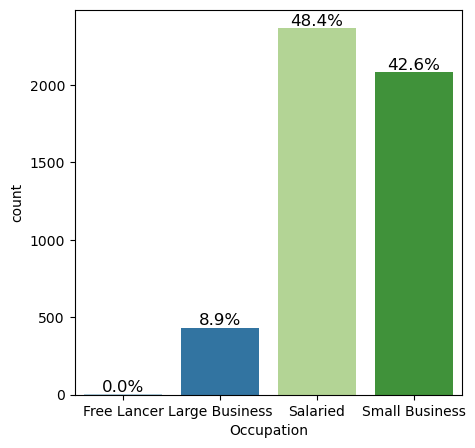

<IPython.core.display.Javascript object>

In [23]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Occupation",True, False) 

**Observations:**

1. 48.4% of customers are Salaried.
2. Customers with Small Business are the next highest in Occupation at 42.6%. 
3. There are very few Free Lancers as well.

### Gender

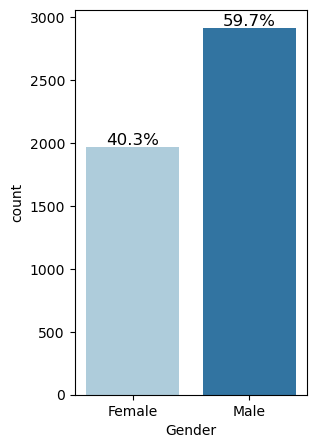

<IPython.core.display.Javascript object>

In [24]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Gender",True, False) 

**Observations:**

Number of Male customers(59.7%) are higher than Female customers (40.3%).

### NumberOfPersonVisiting

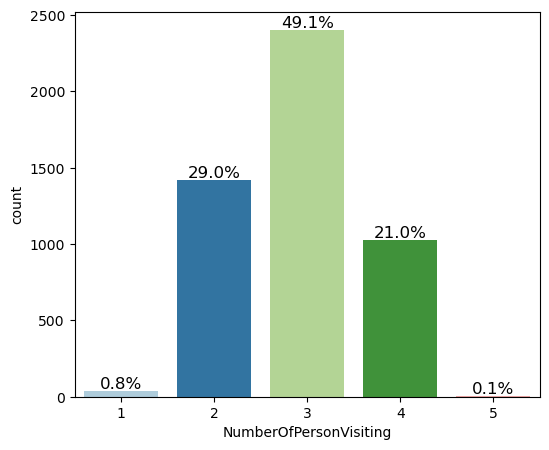

<IPython.core.display.Javascript object>

In [25]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfPersonVisiting",True, False) 

**Observations:**

1. 49.1% of customers plan to take at least 3 persons with them during trip. 
2. Around 29% customers want to take 2 people.
3. 21% customers want to take 4 additional persons with them during their travel.

### NumberOfFollowups

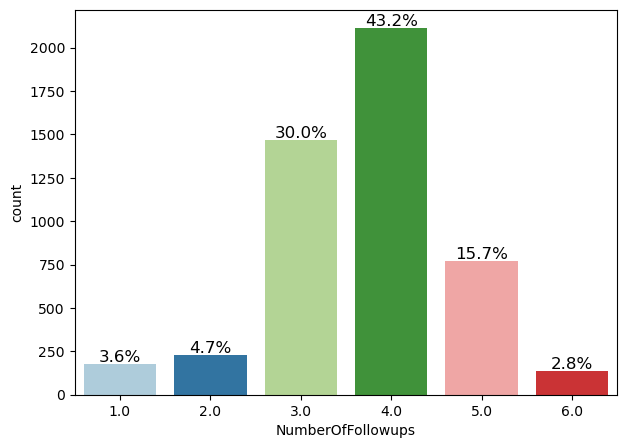

<IPython.core.display.Javascript object>

In [26]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfFollowups",True, False) 

**Observations:**

The highest number of followups is 4.0 followed by 3.0. 

### ProductPitched

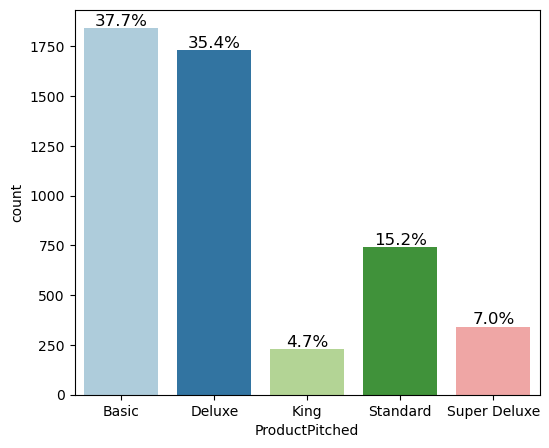

<IPython.core.display.Javascript object>

In [27]:
# use label_barplot function to plot the graph
labeled_barplot(df,"ProductPitched",True, False) 

**Observations:**

1. Basic(37.7%) and Deluxe(35.4%) are the most popular travel packages. 
2. The next slightly popular one is the Standard Travel package at 15.2%.

### PreferredPropertyStar

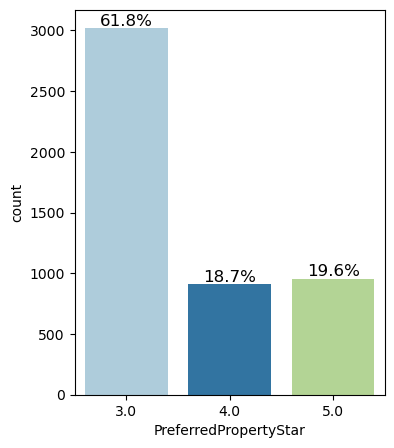

<IPython.core.display.Javascript object>

In [28]:
# use label_barplot function to plot the graph
labeled_barplot(df,"PreferredPropertyStar",True, False) 

**Observations:**

61.8% customers prefer a three star hotel rating compared to four (18.7%) and five (19.6%) star rating hotels

### MaritalStatus

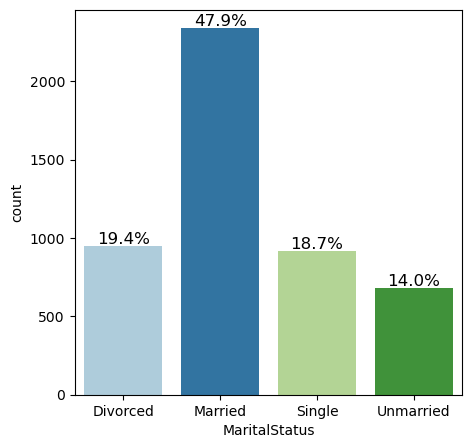

<IPython.core.display.Javascript object>

In [29]:
# use label_barplot function to plot the graph
labeled_barplot(df,"MaritalStatus",True, False) 

**Observations:**

1. Married customers form the bulk of the data at 47.9%.
2. Divorced (19.4%) and Single (18.7%) coming in close at second and third place. 
3. Unmarried customers with partners form 14% of the data.

### NumberOfTrips

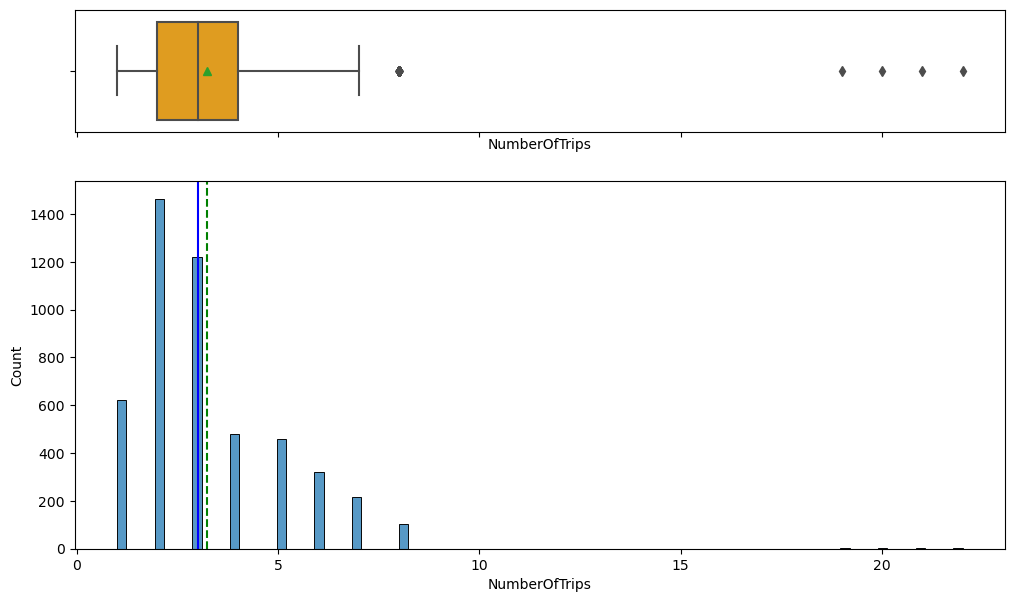

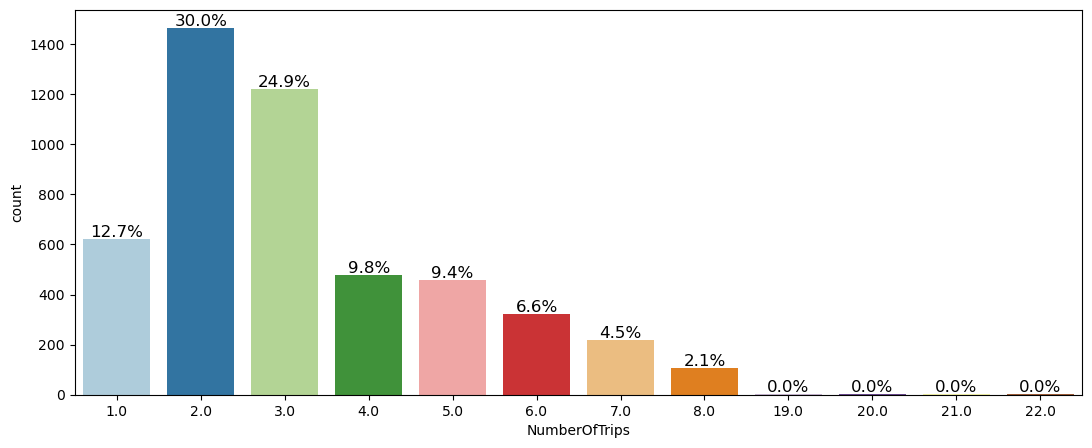

<IPython.core.display.Javascript object>

In [30]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"NumberOfTrips") 

# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfTrips",True, False) 

**Observations:**

1. NumberofTrips is right-skewed a little and majority of the customers seem to take at least 2 trips per year. 
2. We also see very few outliers in the higher end.

### Passport

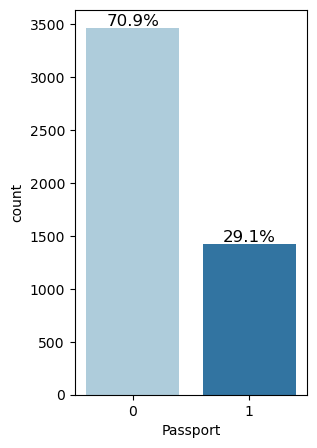

<IPython.core.display.Javascript object>

In [31]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Passport",True, False) 

**Observations:**

Only 29.1% of customers have a passport

### PitchSatisfactionScore

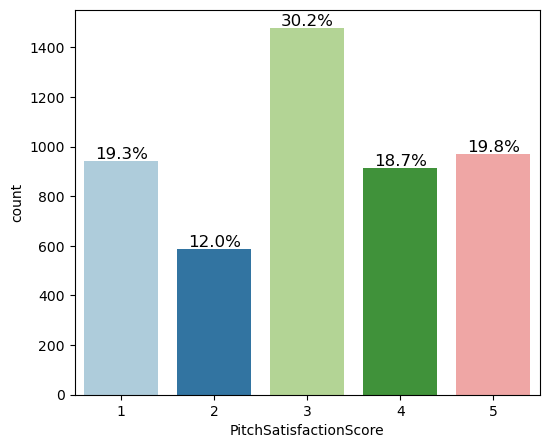

<IPython.core.display.Javascript object>

In [32]:
# use label_barplot function to plot the graph
labeled_barplot(df,"PitchSatisfactionScore",True, False) 

**Observations:**

1. Only 30.2% of customers rated the Sales Pitch with a score of 3. 
2. Even though 18.7% customers rated at 4.
3. 19.8% rated a pitch score of 5.
4. we also see that 19.3% rated the Sales pitch score at 1. 
5. This shows a need for improvement in this area.

### OwnCar

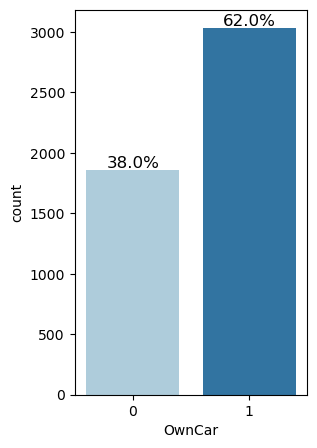

<IPython.core.display.Javascript object>

In [33]:
# use label_barplot function to plot the graph
labeled_barplot(df,"OwnCar",True, False) 

**Observations:**

62% Customers have their own cars

### NumberOfChildrenVisiting

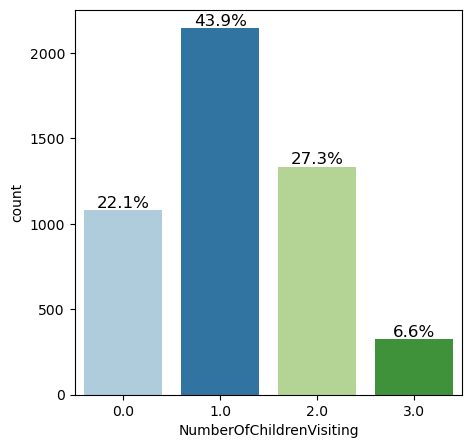

<IPython.core.display.Javascript object>

In [34]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfChildrenVisiting",True, False) 

**Observations:**

Around 43.9% of customers have at least one child under age Five are planning to accompany them in the travels.

### Designation

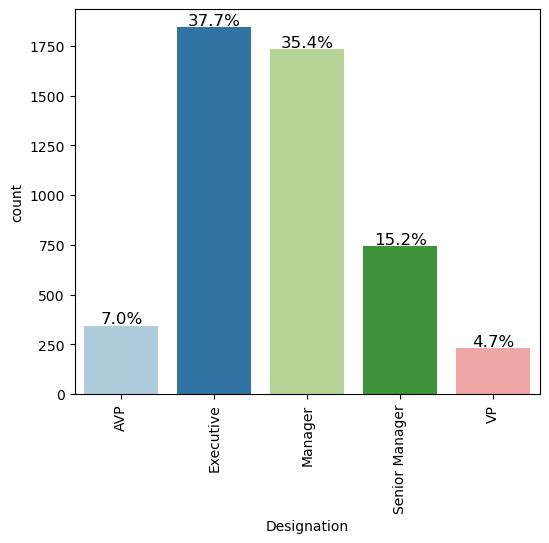

<IPython.core.display.Javascript object>

In [35]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Designation",True, True) 

**Observations:**

Executive (37.7%) and Manager(35.4%) are the highest Designations of the customers in the dataset.

### MonthlyIncome

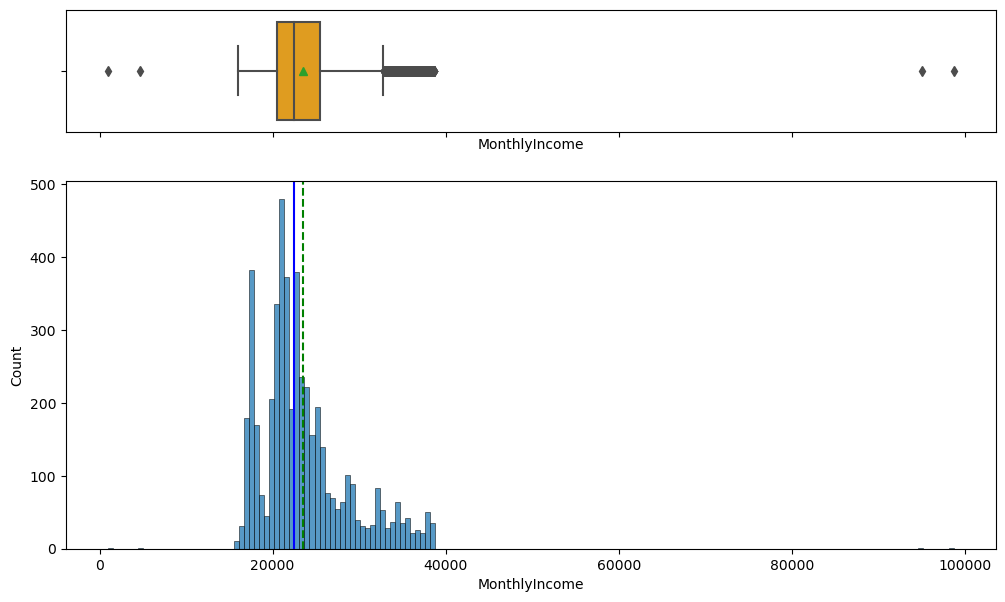

<IPython.core.display.Javascript object>

In [36]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"MonthlyIncome") 

**Observation:**

1. MonthlyIncome is right-skewd. 
2. However, we see that the majority of customers are between income bracket 20K dollars and 30K dollars. 
3. We also see two outliers in the low end and on the highest end. 
4. There are several outliers after the approx 35K dollars income level.

## Bivariate Analysis

### Comparision of Numerical Variables with ProdTaken to understand the relation

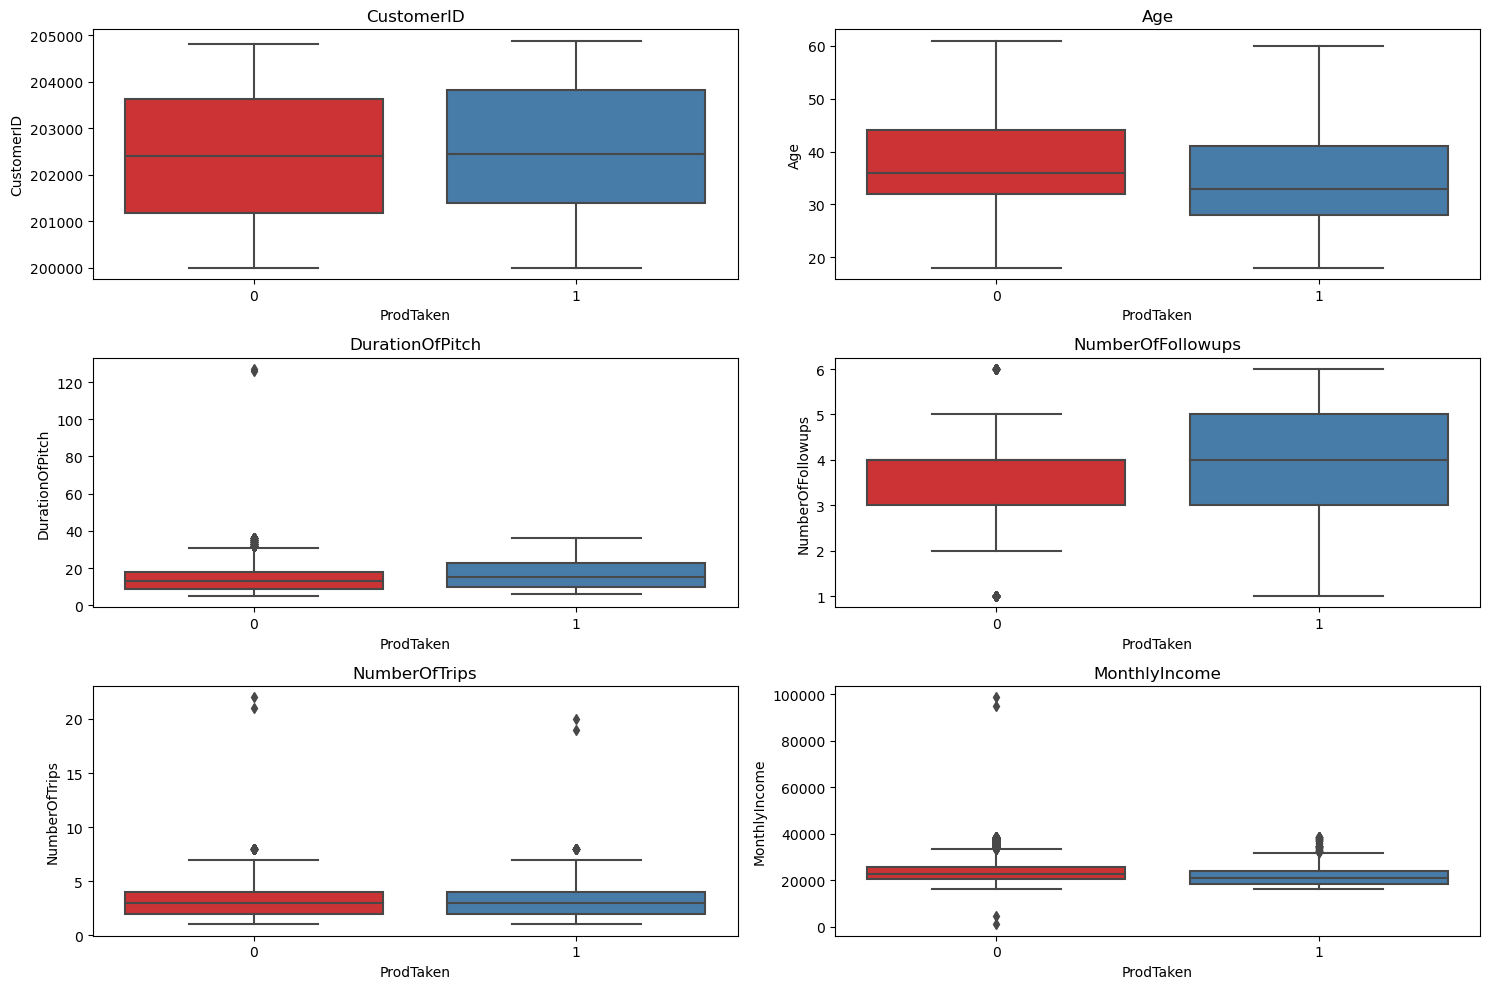

<IPython.core.display.Javascript object>

In [37]:
# for all numerical variables with Personal_Loan draw box plots
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,10))
for i, variable in enumerate(num_cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**

1. The mean Age for customers who purchased any Product is slightly less than those who didn"t. 
2. The mean DurationofPitch for both classed of ProdTaken is almost equal. We see there are many outliers in Class "0" of ProdTaken,
suggesting that longer pitch durations doesn"t lead to product purchase.
3. Customers who purchased the packages had an average of at least four followups, compared to customers who didnt.
4. The Averages for NumberofTrips and MonthlyIncome;for both Classes of ProdTaken is almost equal. 
5. MonthlyIncome variable has several outliers in the higher end for both ProdTaken classes and very few in low end of Class "0".
6. We also see that Age variable doesn"t have any outliers.
7. CustomerID Column is not relevant for analysis, we will exclude the same from model building.

### TypeofContact VS ProdTaken

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


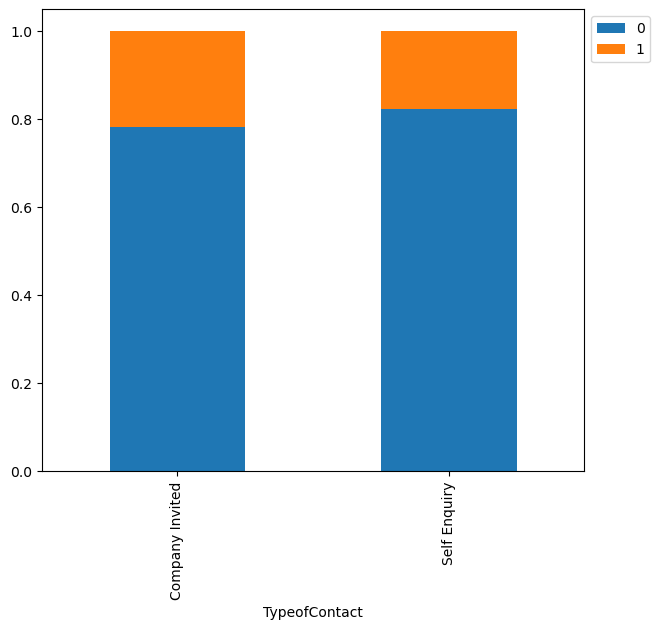

<IPython.core.display.Javascript object>

In [38]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "TypeofContact", "ProdTaken")

**Observations:**

More Customers with "Company Invited" contact have bought Travel Package when compared to Customers with "Self Enquiry".

### CityTier VS ProdTaken

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


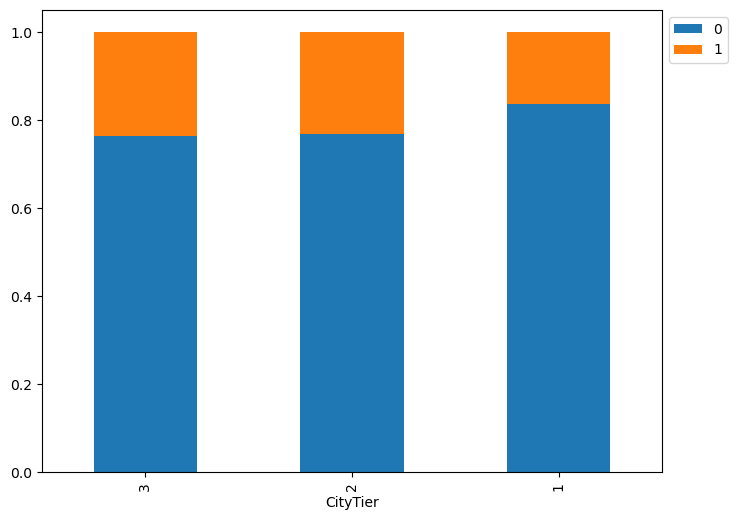

<IPython.core.display.Javascript object>

In [39]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "CityTier", "ProdTaken")

**Observations:**

More Customers from Tier 2 and 3 cities have purchased Travel Packages.

### Occupation VS ProdTaken

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


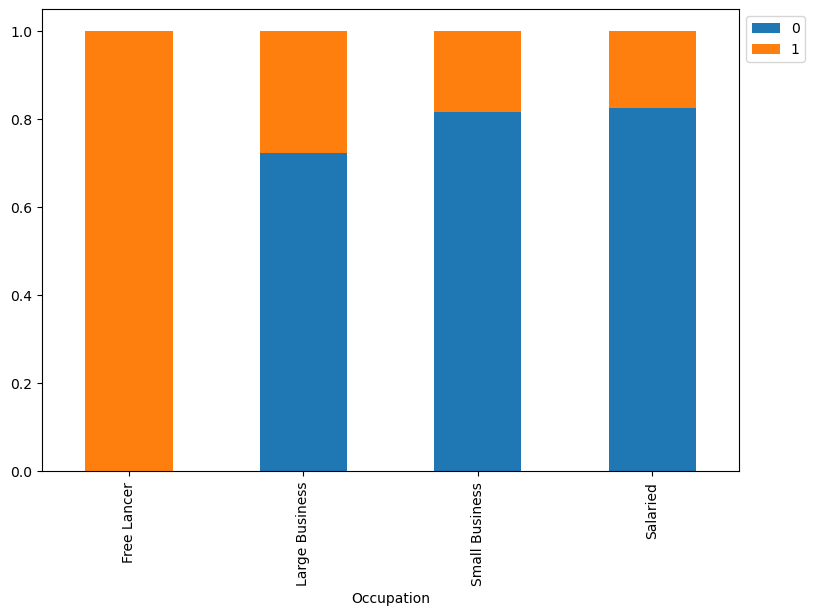

<IPython.core.display.Javascript object>

In [40]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Occupation", "ProdTaken")

**Observations:**

1. Customers who are  Freelancers by Occupation have bought travel packages. However the sample size is only two. 
2. Of the 434 Large Business owning customers, almost 30% bought travel packages. 
3. Among Salaried and Small Business owning customers,close to 20% have bought travel packages.

### Gender VS ProdTaken

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


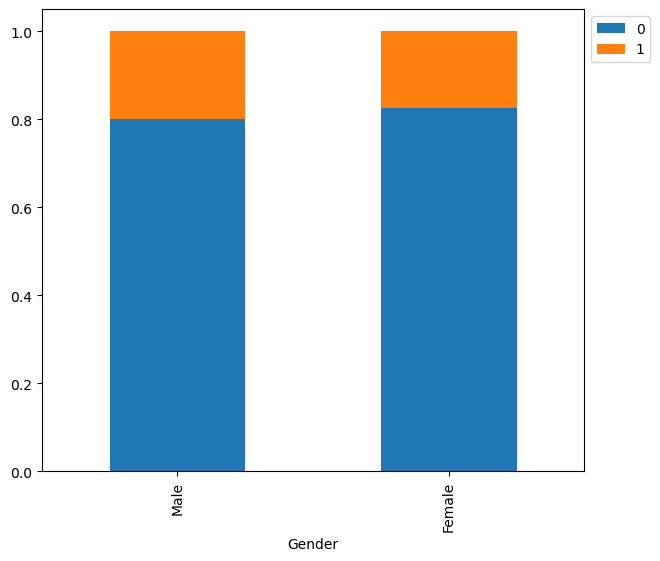

<IPython.core.display.Javascript object>

In [41]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Gender", "ProdTaken")

**Observations:**

Number of Male customers are higher than Female customers, however we dont see a lot of difference in the percentage of each Gender select the Product.

### NumberOfPersonVisiting VS ProdtTaken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


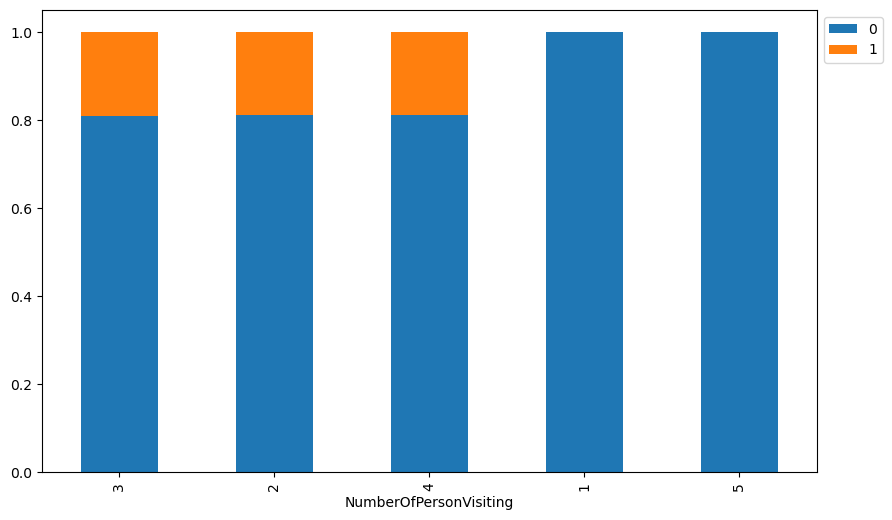

<IPython.core.display.Javascript object>

In [42]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "NumberOfPersonVisiting", "ProdTaken")

**Observations:**

1. Customers who plan to take between 2-4 persons with them during travel, close to 20%  have bought a travel package product.
2. We see that all Customers with one companion and five companions, did not purchase any product. 
3. This suggests that the products don"t seem either appealing or beneficial to the customers of the above two categories. 
4. Business should focus on this area.

### ProductPitched VS ProdTaken

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


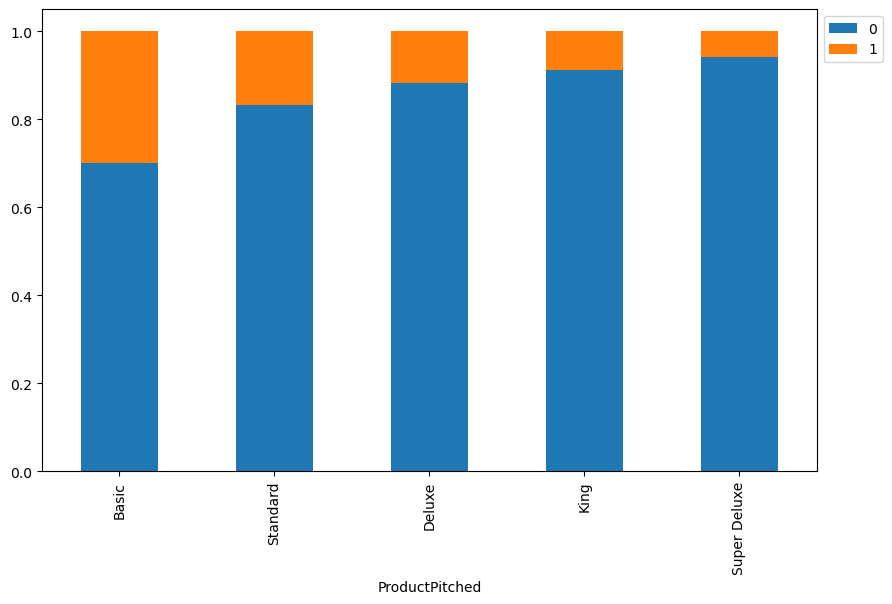

<IPython.core.display.Javascript object>

In [43]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "ProductPitched", "ProdTaken")

**Observations:**

1. The Basic Package is the most preferred 
2. Standard and Deluxe are following.
3. Very few customers purchased Super Deluxe products.

### PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3.0                    2531  488  3019
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


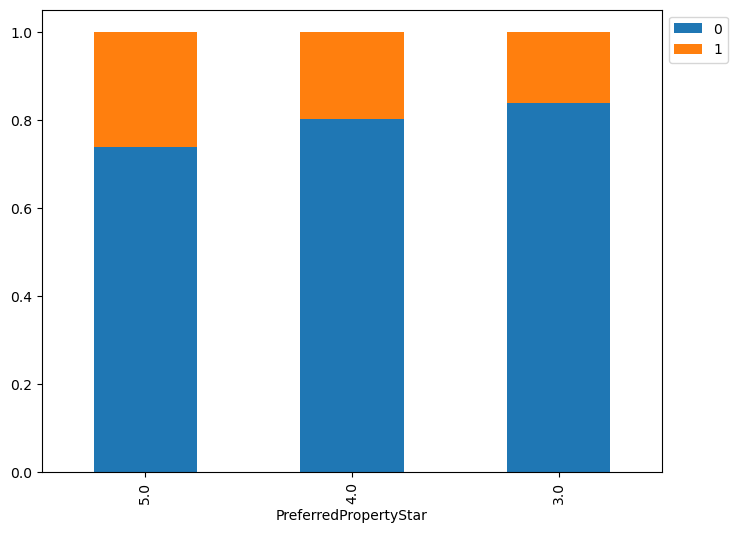

<IPython.core.display.Javascript object>

In [44]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "PreferredPropertyStar", "ProdTaken")

**Observations:**

1. Though majority of customers prefer a 3.0 star rated Property, the percentage of customers purchasing the products is comparatively less than customers who prefer a 4.0 and 5.0 star rated property.
2. The higher the property star rating, higher the number of customers who purchased a product.

### MaritalStatus VS ProdTaken

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


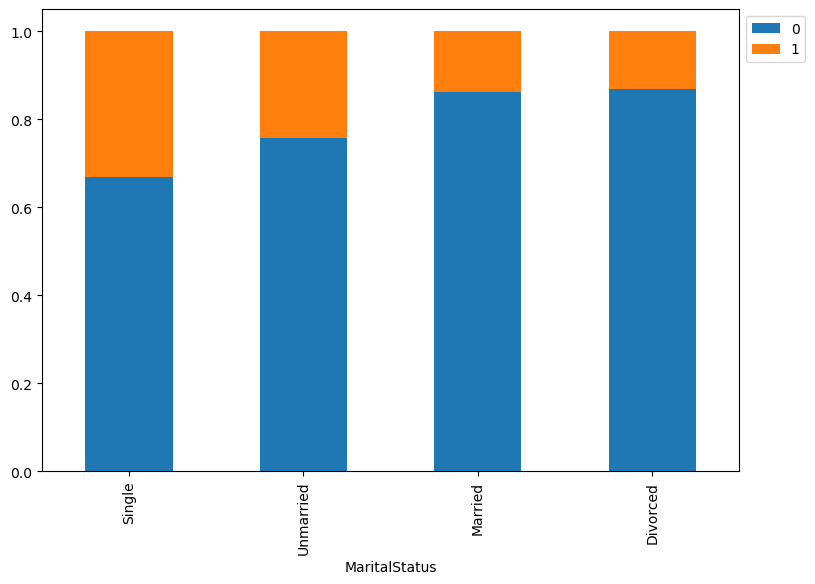

<IPython.core.display.Javascript object>

In [45]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "MaritalStatus", "ProdTaken")

**Observations:**

1. Around 30% of all Single customers have bought a product and about 25% of Unmarried customers have also purchased a product.
2. Almost 50% of the total customers belong to the married category, but we see that only approx 15% of them have actually purchased any product.

### Passport VS ProdTaken

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


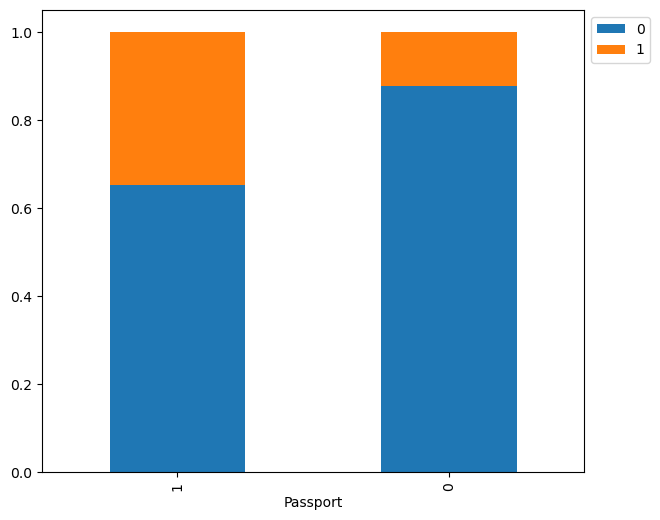

<IPython.core.display.Javascript object>

In [46]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Passport", "ProdTaken")

**Observations:**

Customers with passport tend to purchase products than those who don"t.

### PitchSatisfactionScore VS ProdTaken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


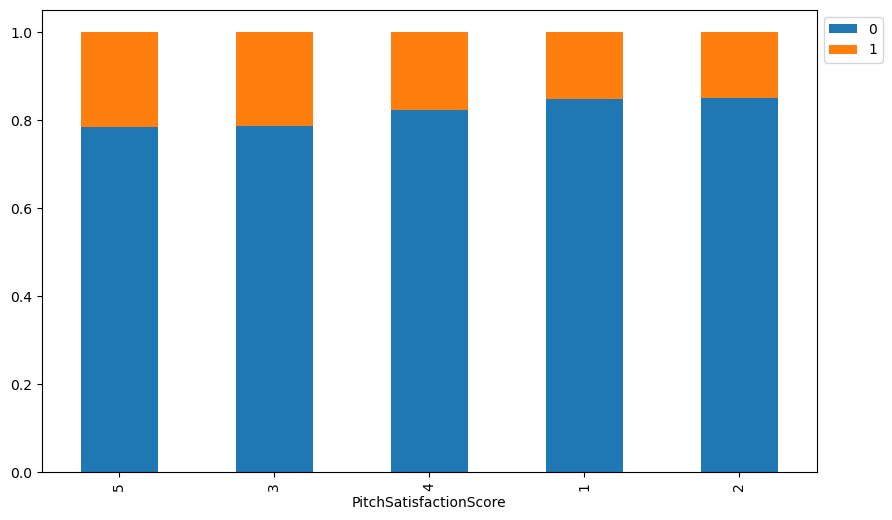

<IPython.core.display.Javascript object>

In [47]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "PitchSatisfactionScore", "ProdTaken")

**Observations:**

1. Majority of customers have given a score of 3.0 to the Sale pitch for the products.
2. But we observe that the number of customers who purchased any product is almost equal across all pitch scores. 

### OwnCar VS ProdTaken

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


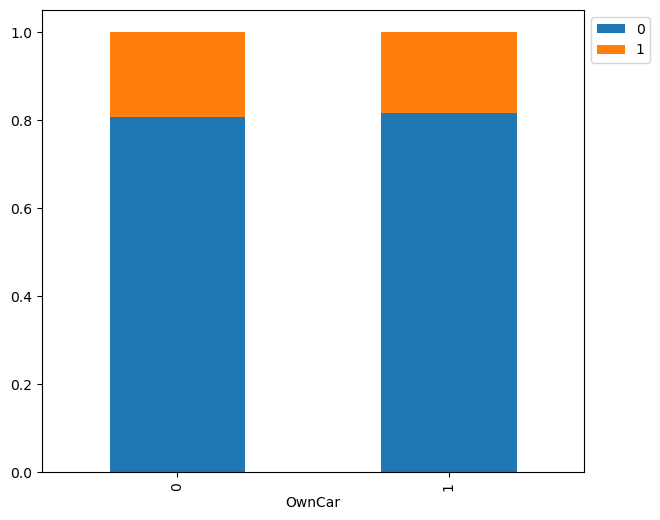

<IPython.core.display.Javascript object>

In [48]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "OwnCar", "ProdTaken")

**Observations:**

There is hardly any difference in the percentage of customers with or without cars, purchasing the product.

### NumberOfChildrenVisiting VS ProdTaken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3968  920  4888
1.0                       1747  399  2146
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


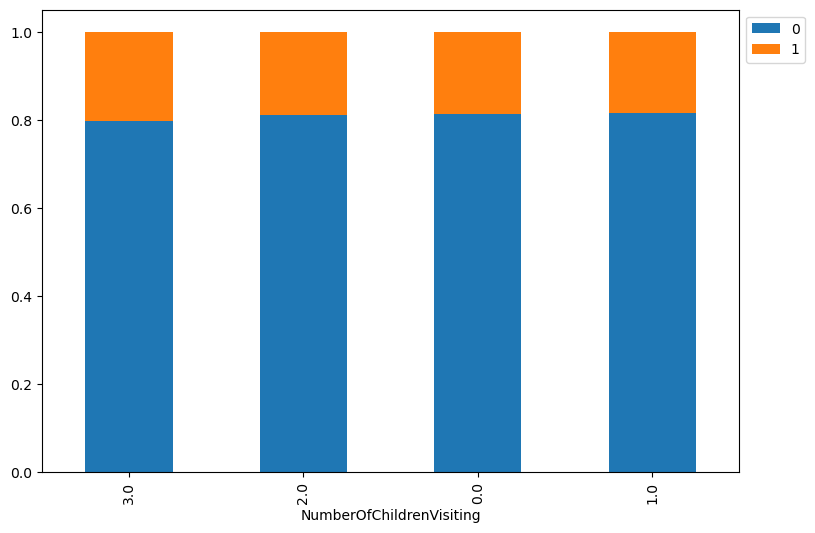

<IPython.core.display.Javascript object>

In [49]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "NumberOfChildrenVisiting", "ProdTaken")

**Observations:**

We see that the percentage of customers who purchased a product is fairly same across all categories of variable NumberOfChildrenVisiting.

### Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


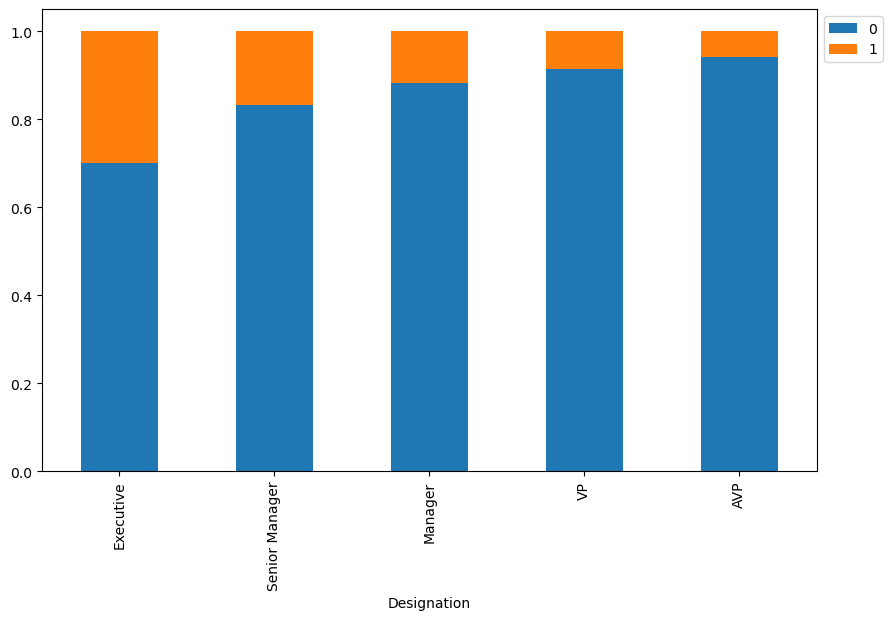

<IPython.core.display.Javascript object>

In [50]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Designation", "ProdTaken")

**Observations:**

1. Around 30% Customers with Executive Designation have purchased a product.
2. Sr. Manager - 16% and Manager - 11% Designation customers have purchased a product. 
3. Very few customers of VP and AVP Designation have purchased a product. 

### Correlation Matrix

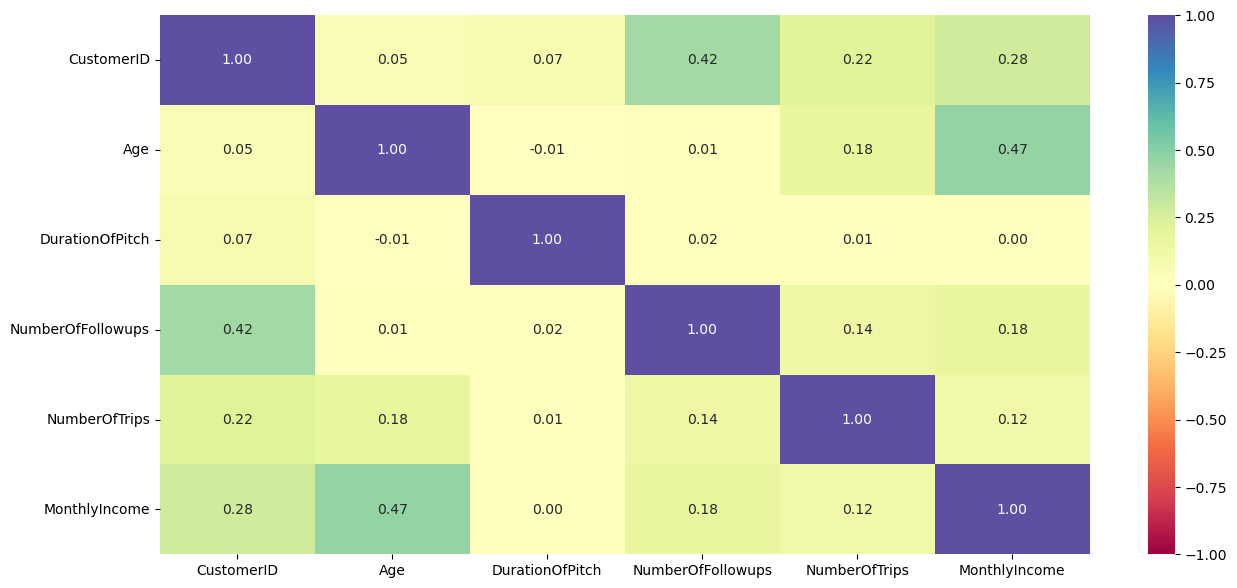

<IPython.core.display.Javascript object>

In [51]:
# heatmap for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

1. The correlation values are quite low between all the variables.
2. Only Age and DurationofPitch have a very low negative correlation.
3. MonthlyIncome and Age have the highest positive correlation at 0.47; i.e as Age increases, so does MontlyIncome
4. NumberofFollowups and NumberofTrips have a  moderate positive correlation between them and also individually with Monthly Income.

## Outliers Treatment

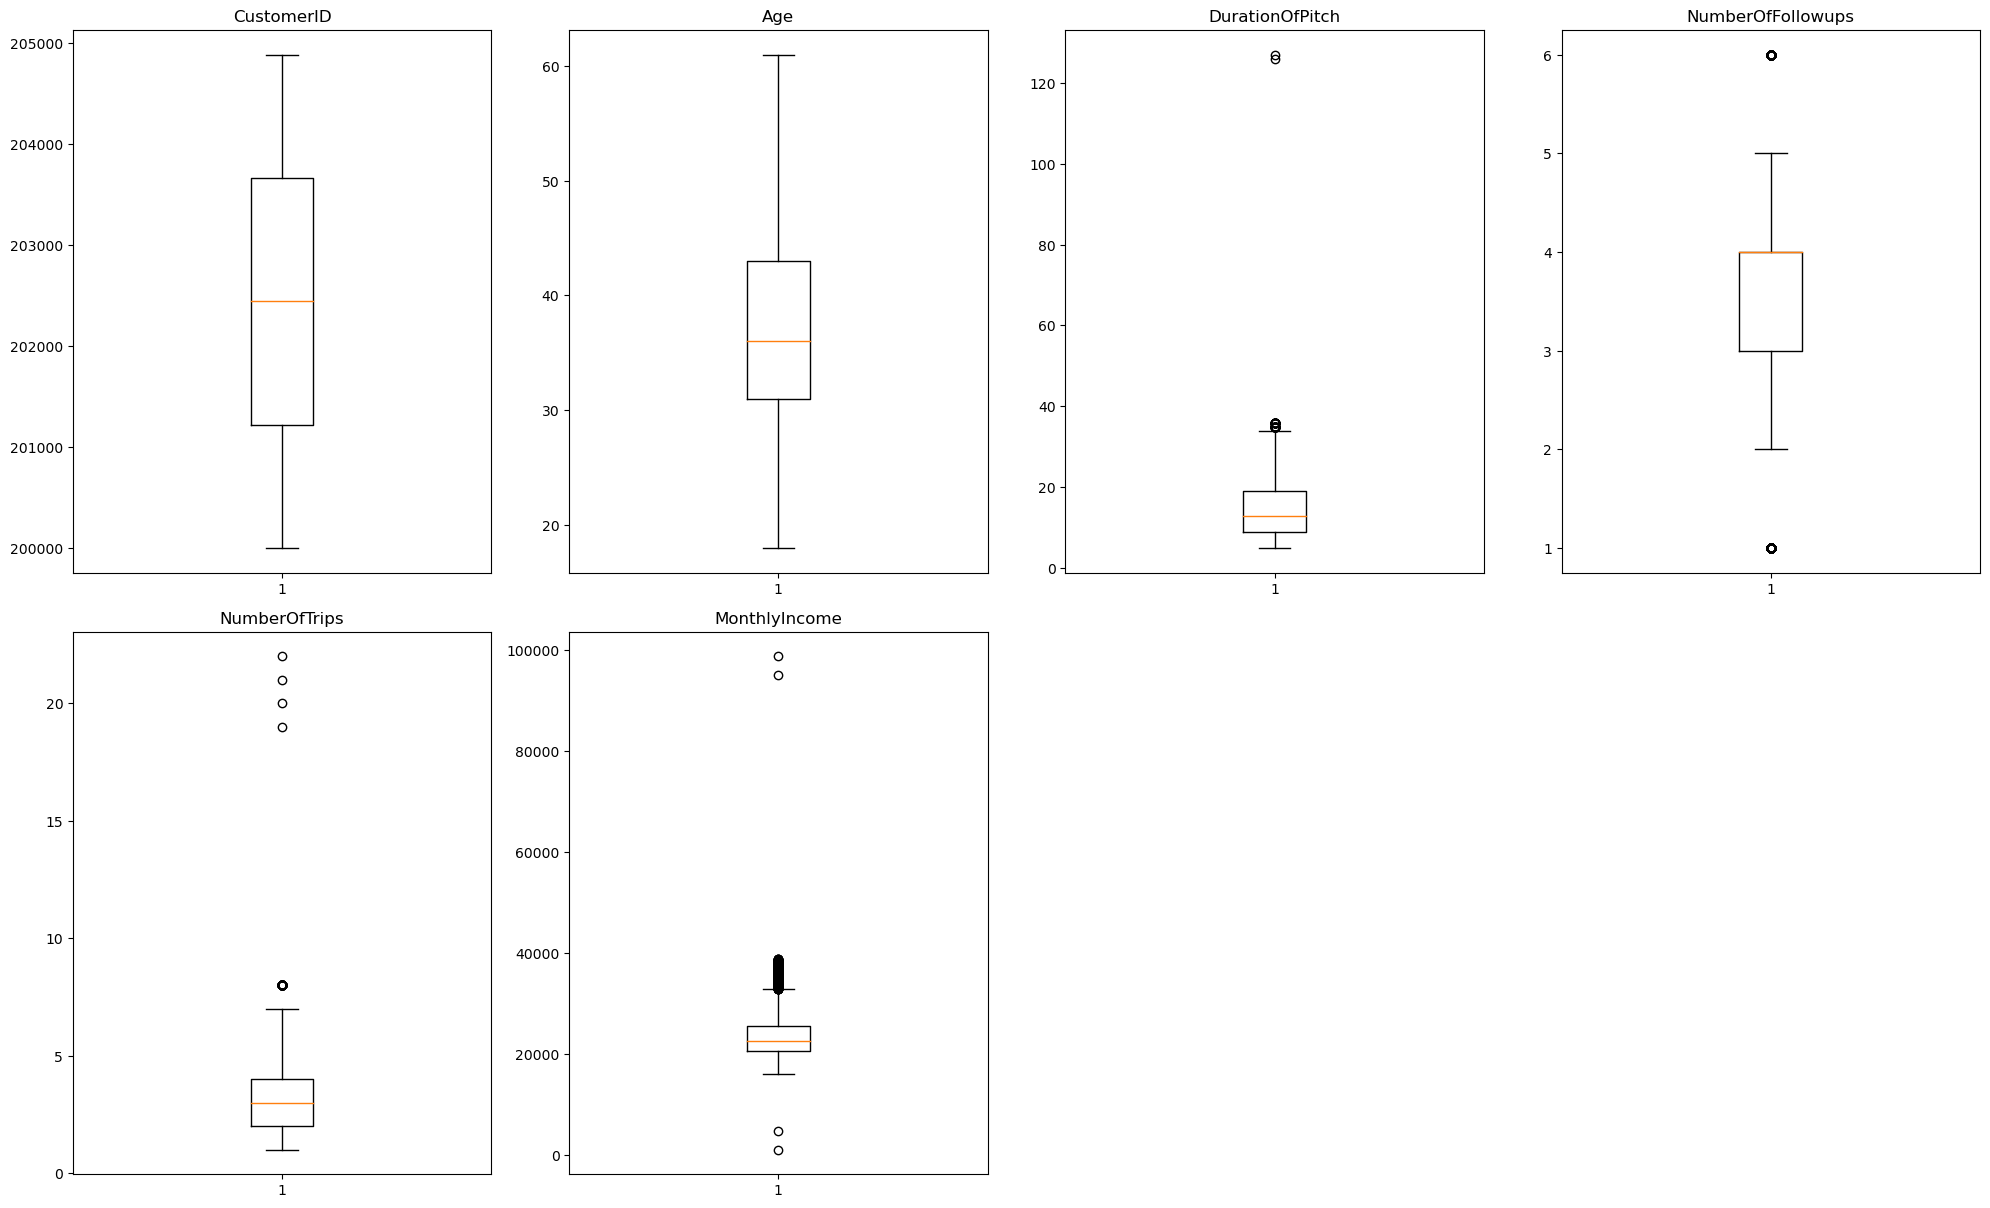

<IPython.core.display.Javascript object>

In [52]:
# check the outliers before treating
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Lets check the percentage of Outliers with IQR

In [53]:
outlier_num = df.select_dtypes(include=np.number)
 
# find the 25th percentile and 75th percentile.
Q1 = df.quantile(0.25)            
Q3 = df.quantile(0.75)

# Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1                           

# find lower and upper bounds for all values. All values outside these bounds are outliers
lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100

CustomerID           0.000000
Age                  0.000000
DurationOfPitch      2.291326
NumberOfFollowups    6.382979
NumberOfTrips        2.229951
MonthlyIncome        7.671849
dtype: float64

<IPython.core.display.Javascript object>

**Observations:**

1. MonthlyIncome and NumberOfFollowups have high outliers.
2. DurationOfPitch and NumberOfTrips also have few outliers.
3. Since we are building DecisionTree Based models and they are not influenced by Outliers, we can choose not to treat these outliers.

## Model Building

### Model Evaluation Criterion

**Model can make two kinds of wrong predictions:**
1. Predicting that the customer will purchase a Travel Package when they don"t. - False Positive.
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative.

**The Travel company"s objectives are:**
1. Make Marketing Expenditure more efficient and focused on the customers that would actually purchase the product.
2. Predict and Identify all potential customers who will purchase the newly introduced travel package.

**Metric for Optimization:**

For the above objectives, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized. The greater the F1-Score, greater the chances of predicting both classes correctly.

**We will build following models, tune them and compare the outcome of all the models:**
1. Decision Tree model.
2. Bagging Classifier.
3. Random Forest Classifier.
4. ADABoost.
5. GradientBoost.
6. XG Boost.
7. Stacking Classifier.

### Split the data in Train and Test Sets

**Customer Interaction data is not relevant for our analysis and we will ignore. Also CustomerID column is not required**

In [54]:
# split the columns in Dependent and Independent Set
X= df.drop(["CustomerID","ProdTaken","PitchSatisfactionScore","ProductPitched","NumberOfFollowups","DurationOfPitch"],axis=1)
y= df["ProdTaken"]

<IPython.core.display.Javascript object>

#### Create dummy variables for the categorical columns

In [55]:
# use get_dummies function to convert the categorical columns
X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

### Split the data in Training and Testing Sets

In [56]:
# splitting data into training and test set, use stratify to maintain the original distribution of Dependent variable as of original set
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=25,stratify=y)

# creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

#### Check the split of target variable ProdTaken

In [57]:
print("Original ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df["ProdTaken"] == 1]), (len(df.loc[df["ProdTaken"] == 1])/len(df.index)) * 100))
print("Original ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df["ProdTaken"] == 0]), (len(df.loc[df["ProdTaken"] == 0])/len(df.index)) * 100))
print("")
print("Training ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test ProdTaken True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test ProdTaken False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original ProdTaken True Values    : 920 (18.82%)
Original ProdTaken False Values   : 3968 (81.18%)

Training ProdTaken True Values    : 644 (18.82%)
Training ProdTaken False Values   : 2777 (81.18%)

Test ProdTaken True Values        : 276 (18.81%)
Test ProdTaken False Values       : 1191 (81.19%)


<IPython.core.display.Javascript object>

### Decision Tree Classifier

In [58]:
# DecistionTreeClassifier with gini and class_weight for appropriate importance
dtc = DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1)

# fit the model on training dataset
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [59]:
# check the scores on Training and Testing Datasets
dtc_score = get_metrics_score(dtc)

Accuracy on training set :  1.0
Accuracy on test set :  0.8520790729379687
Recall on training set :  1.0
Recall on test set :  0.6014492753623188
Precision on training set :  1.0
Precision on test set :  0.608058608058608
F1 on training set :  1.0
F1 on test set :  0.6047358834244079


<IPython.core.display.Javascript object>

#### Visualise the tree

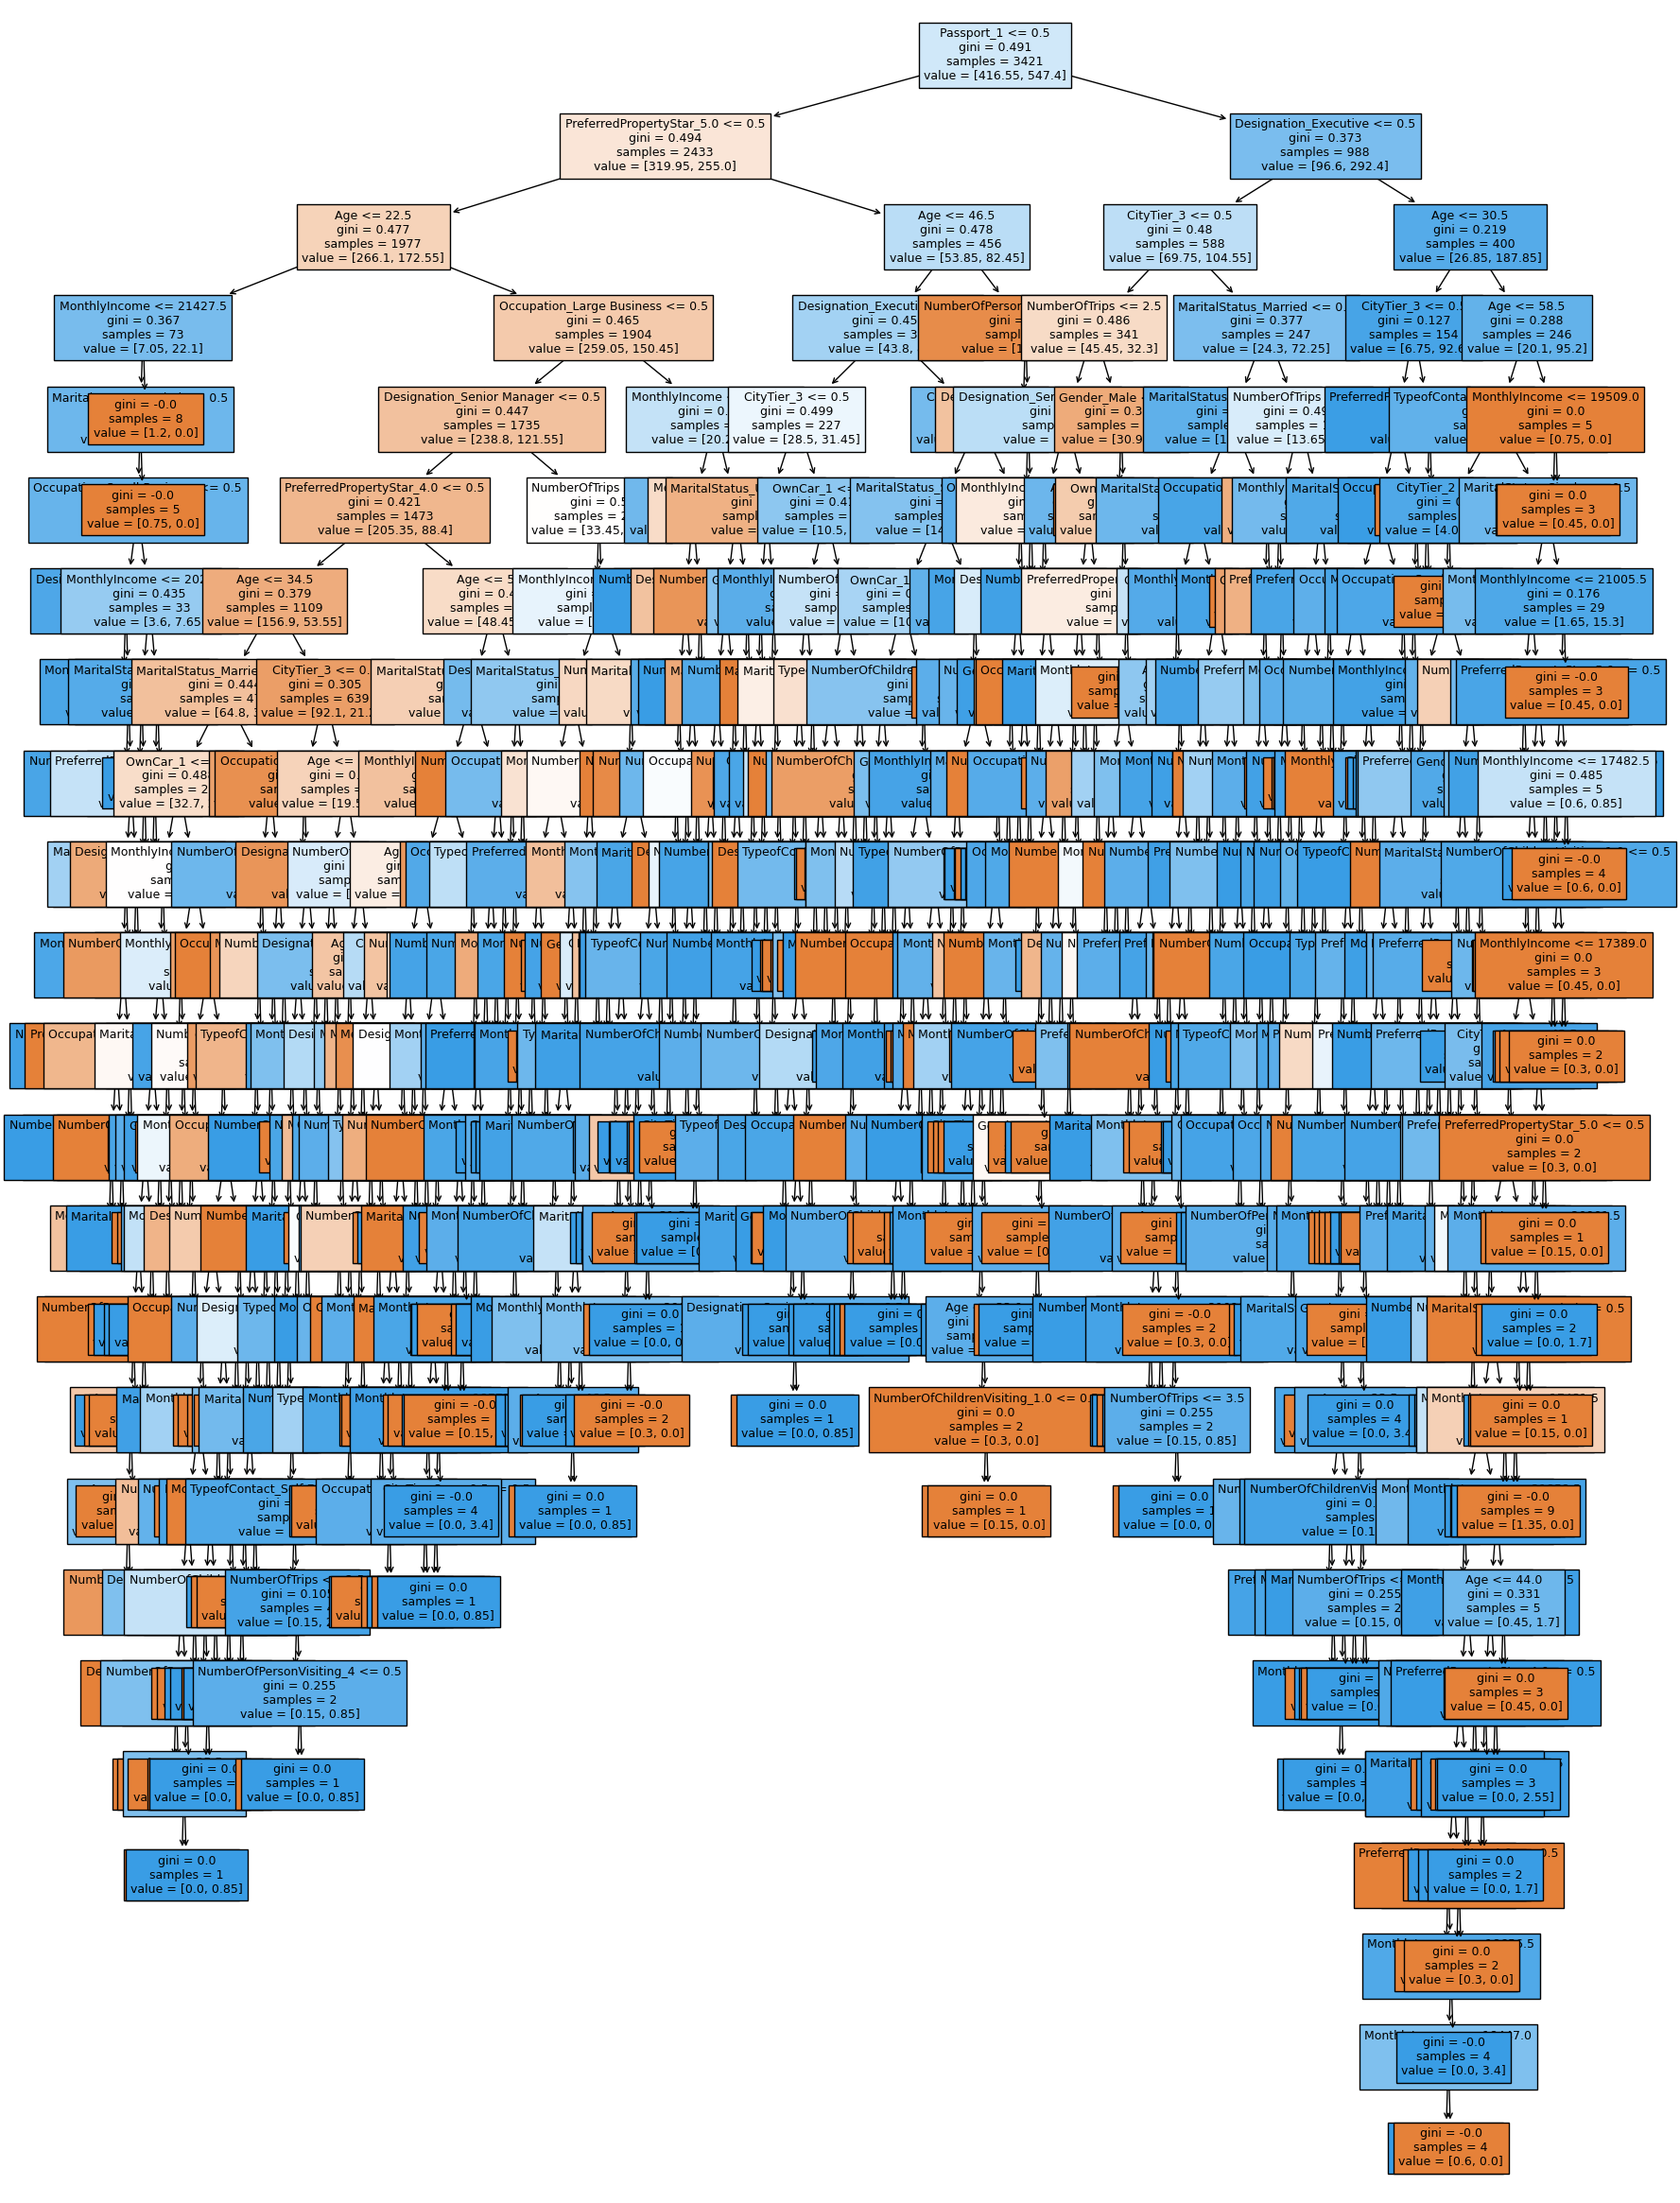

<IPython.core.display.Javascript object>

In [60]:
# plot the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtc,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

#### Draw the confusion matrix

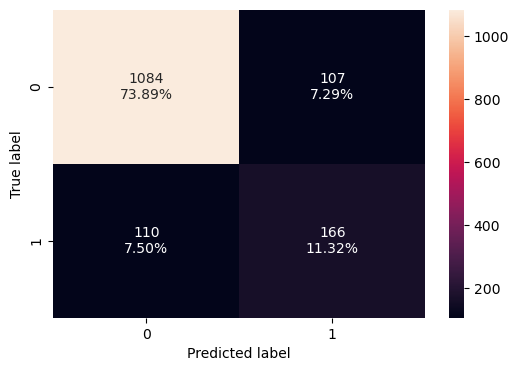

<IPython.core.display.Javascript object>

In [61]:
# use draw_matrix function
draw_matrix(dtc, X_test, y_test)

#### Check the important variables

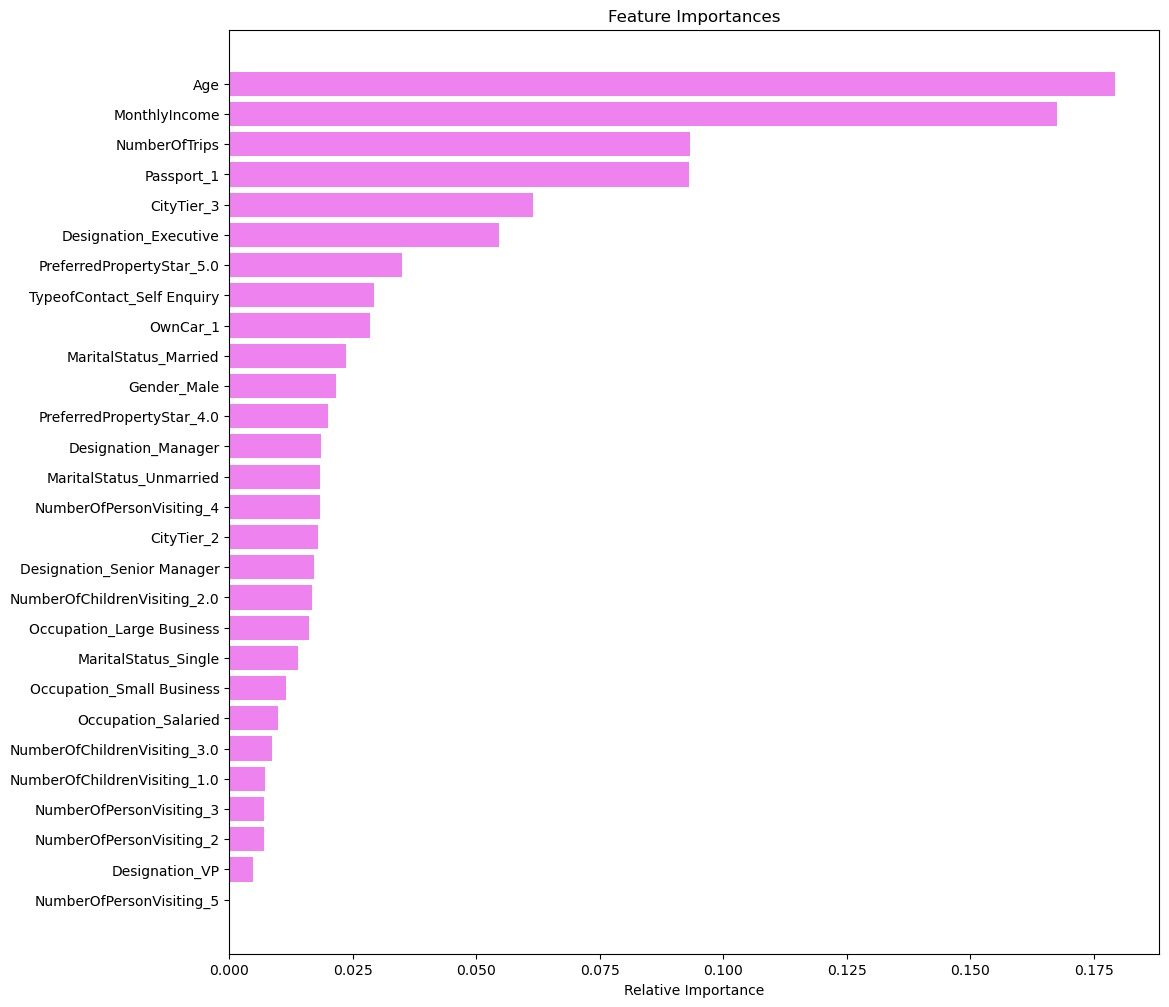

<IPython.core.display.Javascript object>

In [62]:
# plot a horizontal bar graph
importances = dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

1. The model tends to over fit the training set.
2. F1 Score for testing set is 0.60.
3. Age and MonthlyIncome are most important variables.
4. It is difficult to read and understand the tree when drawn.
5. Since the model over fits the training set, we will use GridSearchCV to find the optimum parameters values and hypertine the Decistion Tree Classifier

### Hypertuned Decision Tree Classifier

In [63]:
# choose the type of classifier. 
dtc1 = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85}) #adding classweights 

# defining the Hyperparameters
parameters = {"max_depth": np.arange(10,60,10), 
            "criterion": ["gini","entropy"],
            "min_samples_leaf": [ 2, 5, 7, 10],
            "max_leaf_nodes" : [3, 5, 10,15],}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search with the above parameters
grid_obj = GridSearchCV(dtc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set to the best combination of parameters
dtcht = grid_obj.best_estimator_

# fit the best algorithm to the data. 
dtcht.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=15, min_samples_leaf=2,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Visualise the Tree

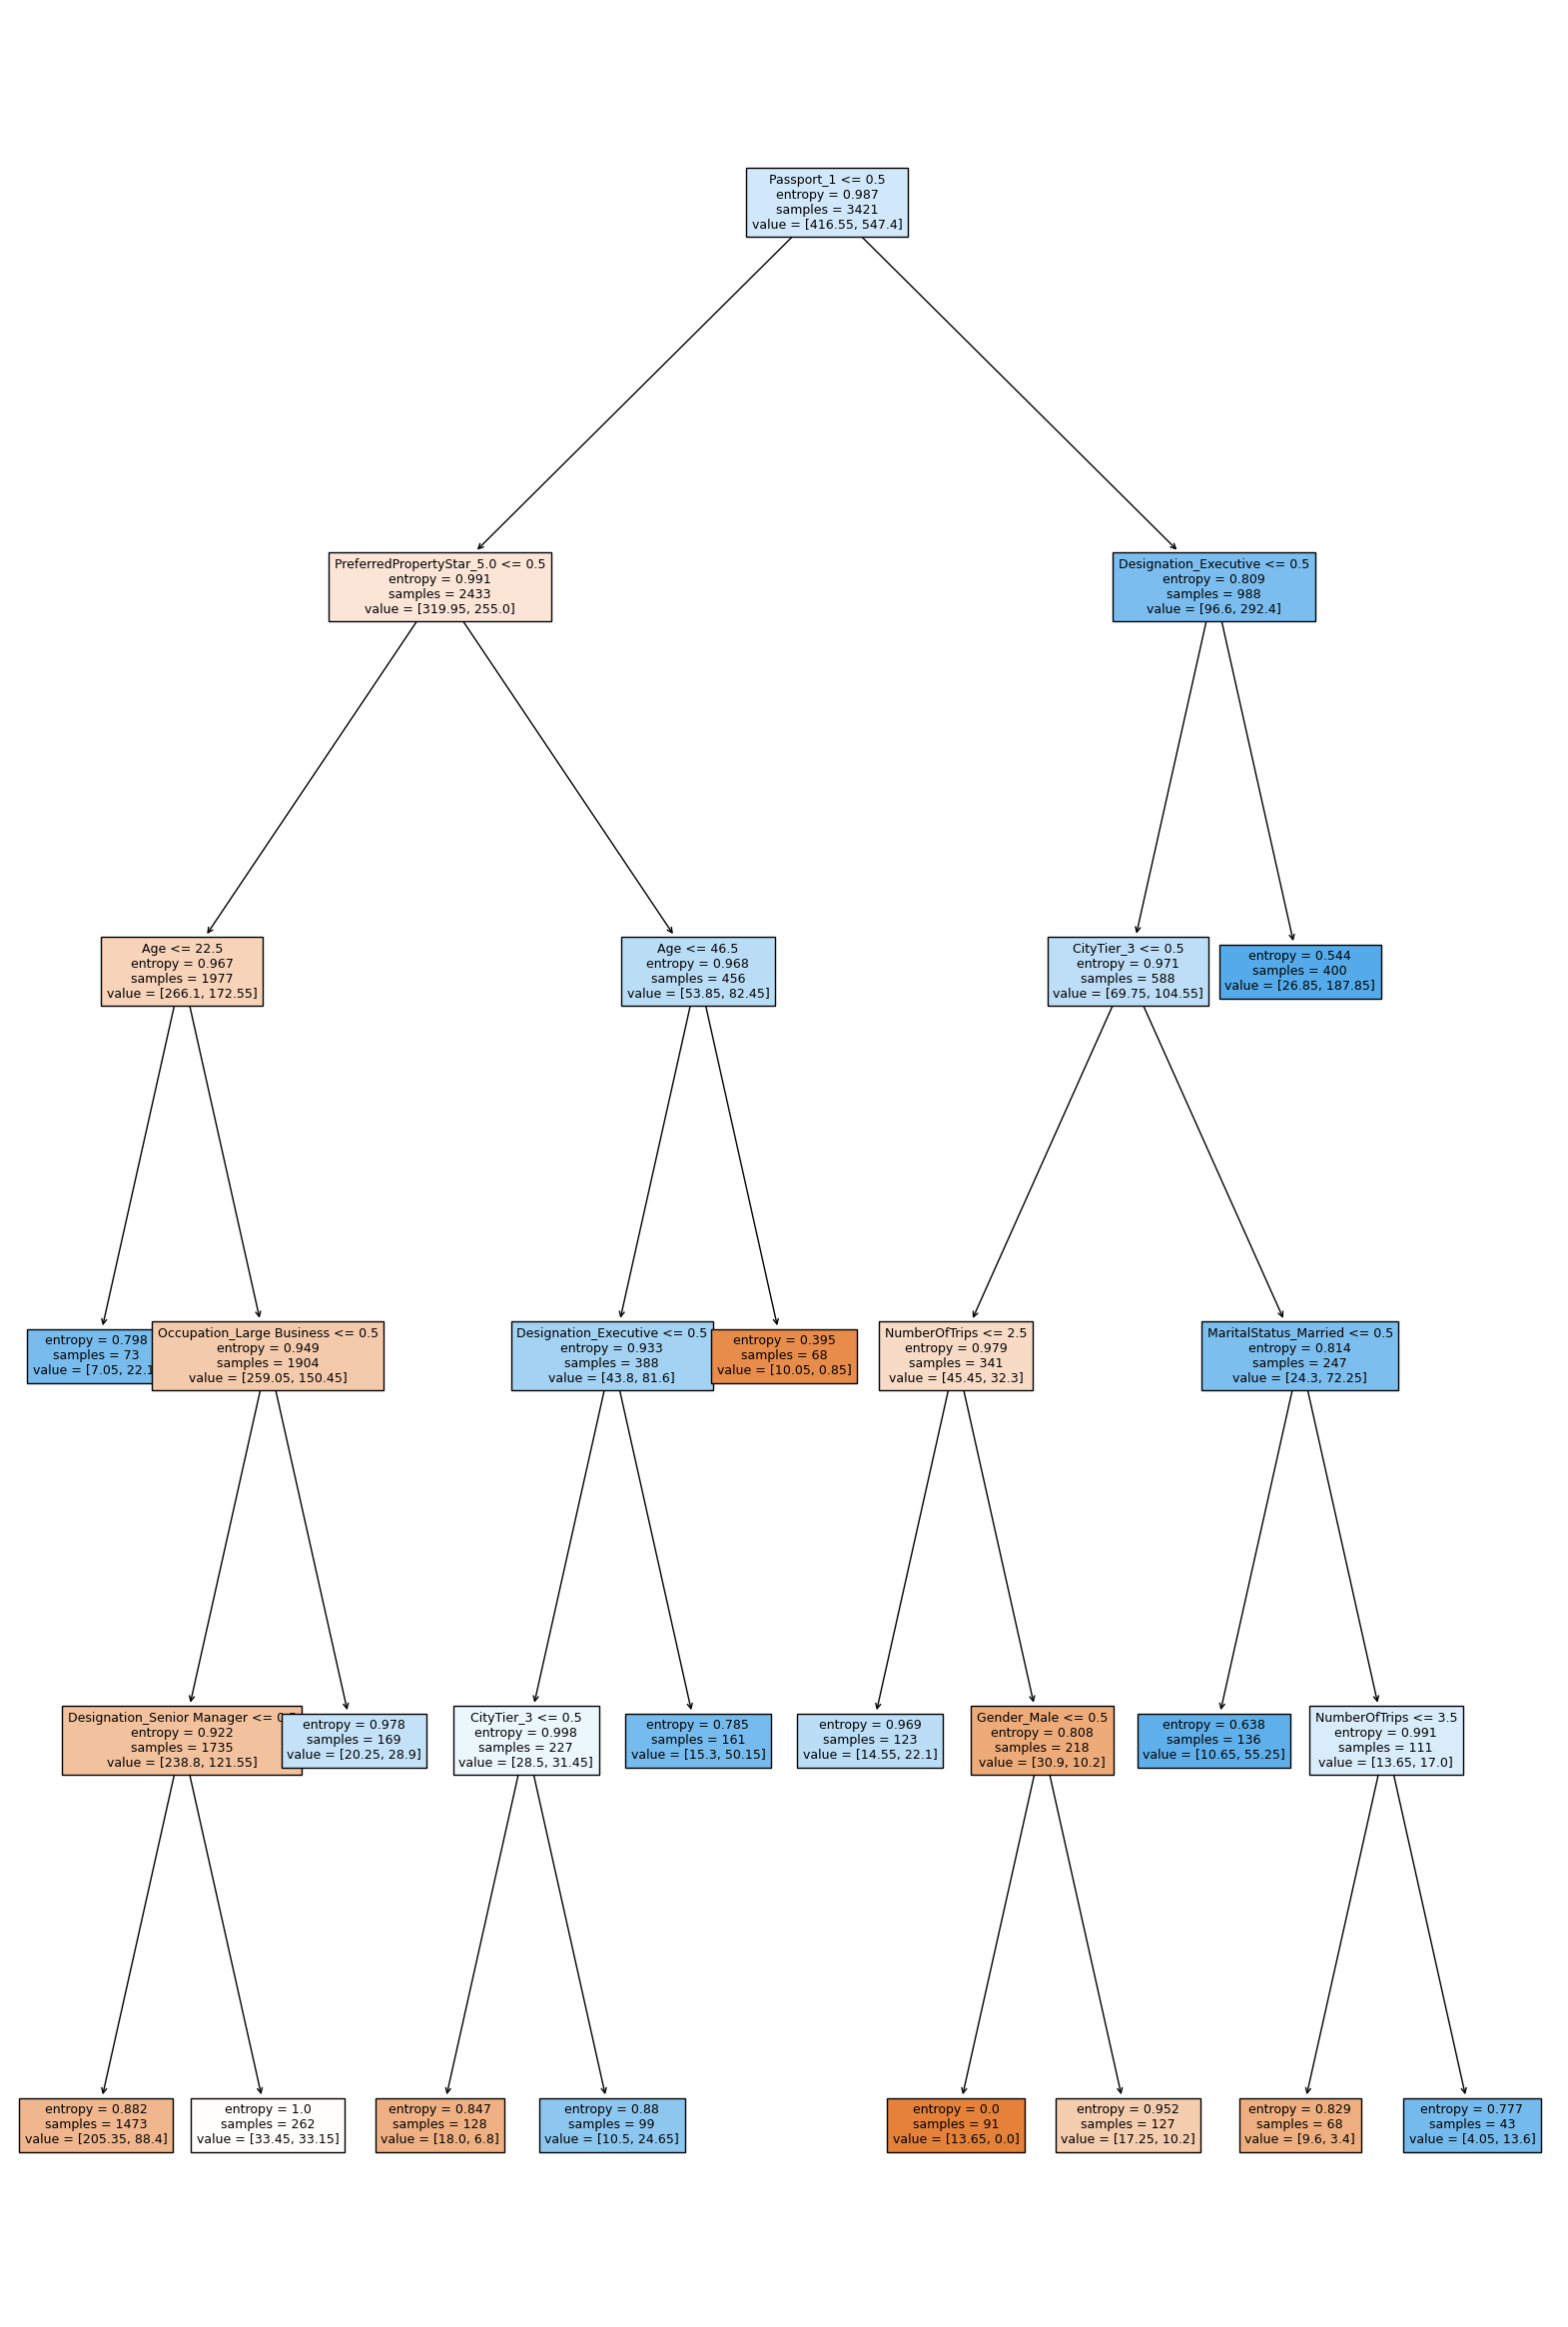

<IPython.core.display.Javascript object>

In [64]:
# plot the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtcht,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

#### Check the scores

In [65]:
# check the scores on Training and Testing Datasets
dtcht_scores = get_metrics_score(dtcht)

Accuracy on training set :  0.7380882782812044
Accuracy on test set :  0.7307430129516019
Recall on training set :  0.7391304347826086
Recall on test set :  0.6992753623188406
Precision on training set :  0.3953488372093023
Precision on test set :  0.3821782178217822
F1 on training set :  0.5151515151515151
F1 on test set :  0.4942381562099872


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

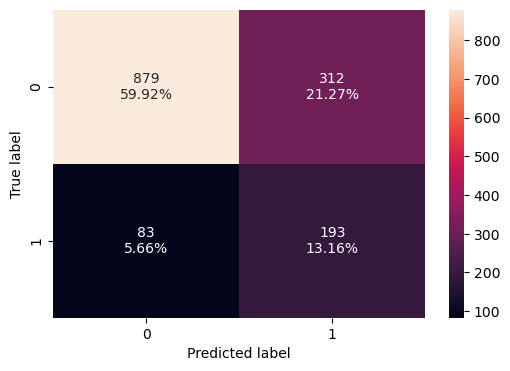

<IPython.core.display.Javascript object>

In [66]:
# use draw_matrix function
draw_matrix(dtcht, X_test, y_test)

#### Check the important variables

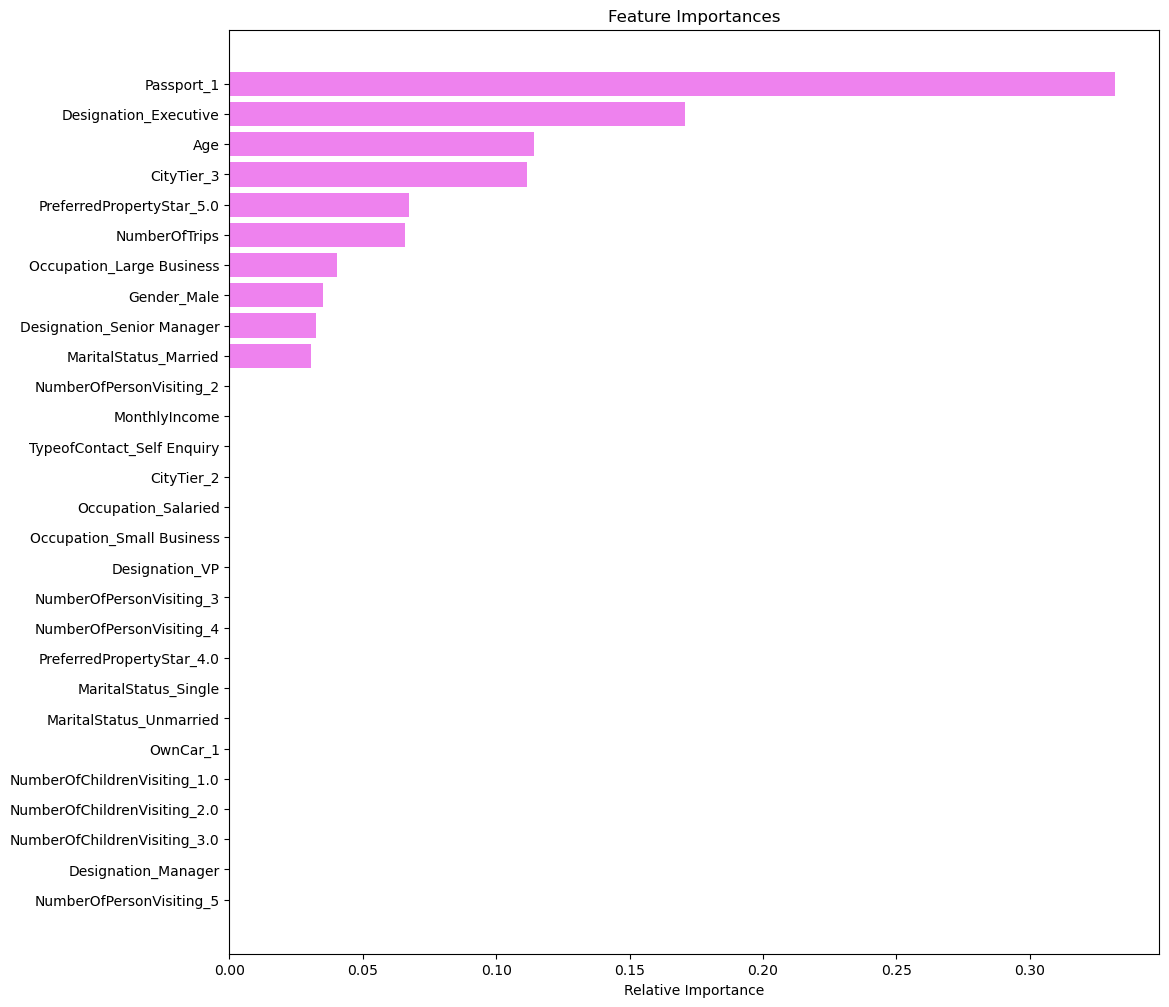

<IPython.core.display.Javascript object>

In [67]:
# plot a horizontal bar graph
importances = dtcht.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

1. F1Score has decreased to 0.51 for Train set and 0.49 for test set. 
2. The performance values for F1Score are close and comparable on the tuned Decision Tree.
3. Passport_1 and Designation_Executive are the new important variables that are considering by the tuned Decision Tree.
4. The tree is readable when drawn.

### Bagging Classifier

In [68]:
# baggingClassifier
bgc = BaggingClassifier(random_state=1)

# fit the model on training dataset
bgc.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [69]:
# check the scores on Training and Testing Datasets
bgc_score = get_metrics_score(bgc)

Accuracy on training set :  0.9897690733703596
Accuracy on test set :  0.8888888888888888
Recall on training set :  0.9472049689440993
Recall on test set :  0.5362318840579711
Precision on training set :  0.9983633387888707
Precision on test set :  0.8087431693989071
F1 on training set :  0.9721115537848606
F1 on test set :  0.644880174291939


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

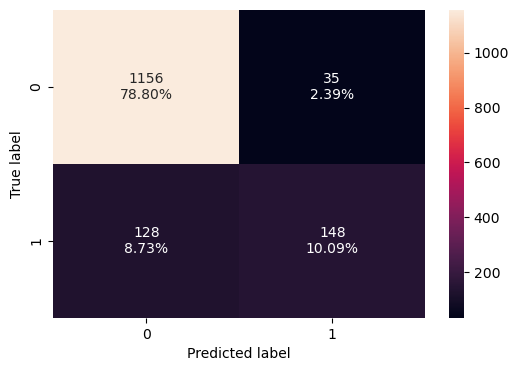

<IPython.core.display.Javascript object>

In [70]:
# use draw_matrix function
draw_matrix(bgc, X_test, y_test)

**Observations:**

1. The model is over fitting.
2. The Bagging classifier has a better accuracy metric and the F1 score is also higher.
3. But model only predicts 10.09% of the total 13% of True positives.

### Bagging Classifier with Logistic_Regression

In [71]:
# BaggingClassifier with gini and class_weight for appropriate importance
bgclr = BaggingClassifier(base_estimator=LogisticRegression(solver="liblinear", random_state=1),random_state=1) 

# fit the model on training set
bgclr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [72]:
# check the scores on Training and Testing Datasets
bgclr_score = get_metrics_score(bgclr)

Accuracy on training set :  0.8117509500146156
Accuracy on test set :  0.8118609406952966
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0
F1 on training set :  0.0
F1 on test set :  0.0


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

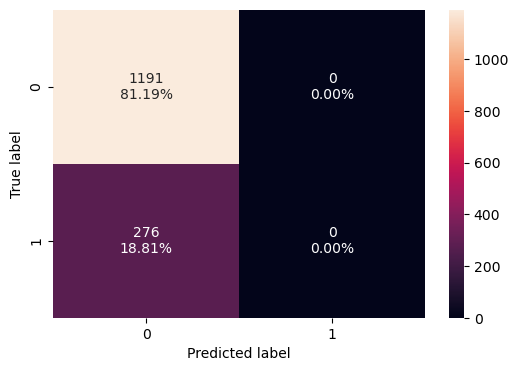

<IPython.core.display.Javascript object>

In [73]:
# use draw_matrix function
draw_matrix(bgclr, X_test, y_test)

**Observations:**

1. Use the Logistic_Regression as base estimator does not fit for our analysis as it has reduced the f1_score to zero.
2. The model is not able to identify any true positives.
3. However the model is not over fitting, it also gives us the comparable accuracy on both training and testing sets.
4. Let us try Bagging Classifier with base_estimator as DecisionTreeClassifier.

### Bagging Classifier with Decision Tree

In [74]:
# BaggingClassifier with gini and class_weight for appropriate importance
bgcdt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1),random_state=1)

# fit the model on training set
bgcdt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [75]:
# check the scores on Training and Testing Datasets
bgcdt_score = get_metrics_score(bgcdt)

Accuracy on training set :  0.9877228880444314
Accuracy on test set :  0.8875255623721882
Recall on training set :  0.9394409937888198
Recall on test set :  0.4855072463768116
Precision on training set :  0.9950657894736842
Precision on test set :  0.8535031847133758
F1 on training set :  0.9664536741214057
F1 on test set :  0.6189376443418014


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

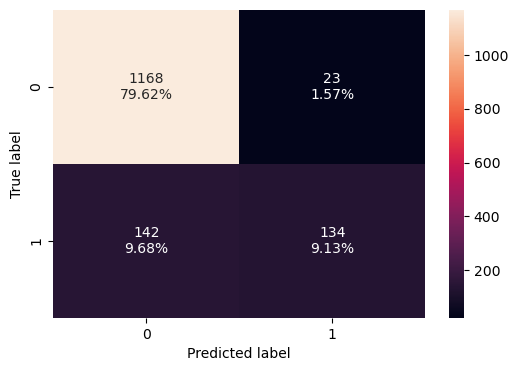

<IPython.core.display.Javascript object>

In [76]:
# use draw_matrix function
draw_matrix(bgcdt, X_test, y_test)

**Observations:**

1. The model with weighted decision tree hasn"t improved the metrics.
2. The true positive"s identified are even lesser.

### Hypertuned Bagging Classifier

In [77]:
# set the parameters
parameters = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

# assigning Bootstrap = True to select features with Replacement
bgc1 = BaggingClassifier(random_state=1,bootstrap=True)

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(bgc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
bgcht = grid_obj.best_estimator_

# fit the best algorithm to the data.
bgcht.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [78]:
# check the scores on Training and Testing Datasets
bgcht_score = get_metrics_score(bgcht)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9045671438309475
Recall on training set :  0.9968944099378882
Recall on test set :  0.5688405797101449
Precision on training set :  1.0
Precision on test set :  0.8820224719101124
F1 on training set :  0.9984447900466563
F1 on test set :  0.6916299559471365


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

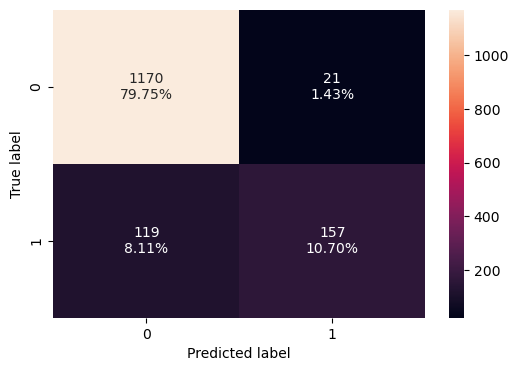

<IPython.core.display.Javascript object>

In [79]:
# use draw_matrix function
draw_matrix(bgcht, X_test, y_test)

**Observations:**

1. We see that the Train and Test Accuracy and F1Score Performance has increased after tuning compared to the previous models.
2. The Model is over-fitting as the difference between  Train and Test scores are very high.
3. The Model seems to identify all non-buyers better as the False Positive value is low.

### Random Forest Classifier

In [80]:
# random forest classifier
rfc = RandomForestClassifier(random_state=1)

# fit the model on training set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [81]:
# check the scores on Training and Testing Datasets
rfc_score = get_metrics_score(rfc)

Accuracy on training set :  1.0
Accuracy on test set :  0.8847989093387867
Recall on training set :  1.0
Recall on test set :  0.4492753623188406
Precision on training set :  1.0
Precision on test set :  0.8794326241134752
F1 on training set :  1.0
F1 on test set :  0.5947242206235012


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

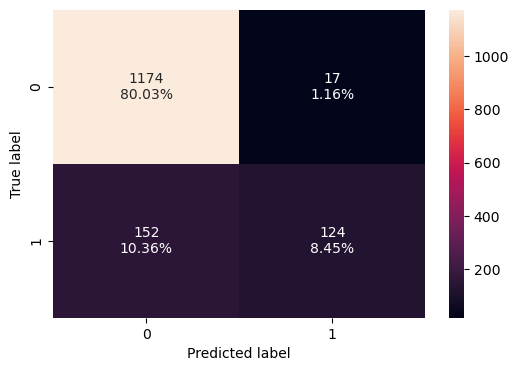

<IPython.core.display.Javascript object>

In [82]:
# use draw_matrix function
draw_matrix(rfc, X_test, y_test)

#### Check the important variables

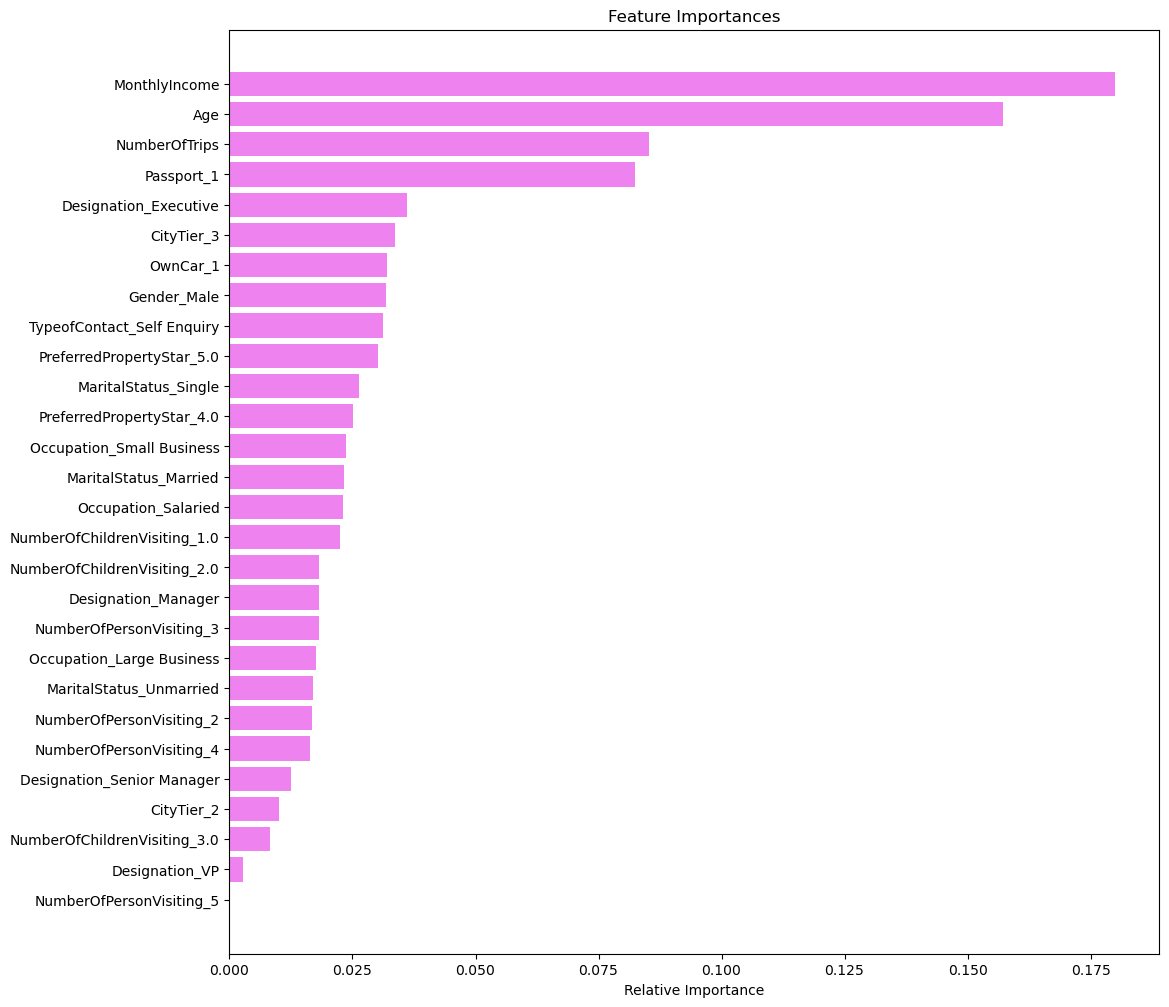

<IPython.core.display.Javascript object>

In [83]:
# plot a horizontal bar graph
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

1. Random Forest classifier is also overfitting on the training set.
2. The F1 score metric has also reduced.
3. Monthly_Income and Age are the most important variables.

### Random Forest Classifier with weights

In [84]:
# random forest classifier 
rfcwt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

# fit the model on training set
rfcwt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [85]:
# check the scores on Training and Testing Datasets
rfcwt_score = get_metrics_score(rfcwt)

Accuracy on training set :  1.0
Accuracy on test set :  0.8793456032719836
Recall on training set :  1.0
Recall on test set :  0.4166666666666667
Precision on training set :  1.0
Precision on test set :  0.8778625954198473
F1 on training set :  1.0
F1 on test set :  0.5651105651105651


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

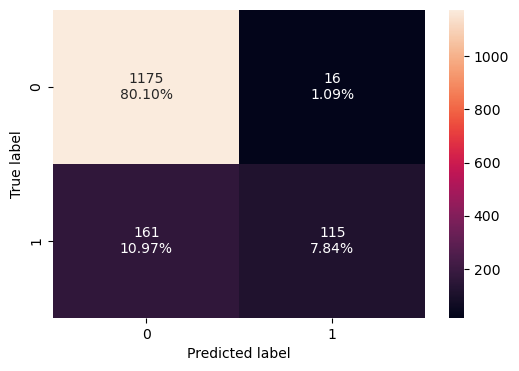

<IPython.core.display.Javascript object>

In [86]:
# use data_matrix function
draw_matrix(rfcwt, X_test, y_test)

#### Check the important variables

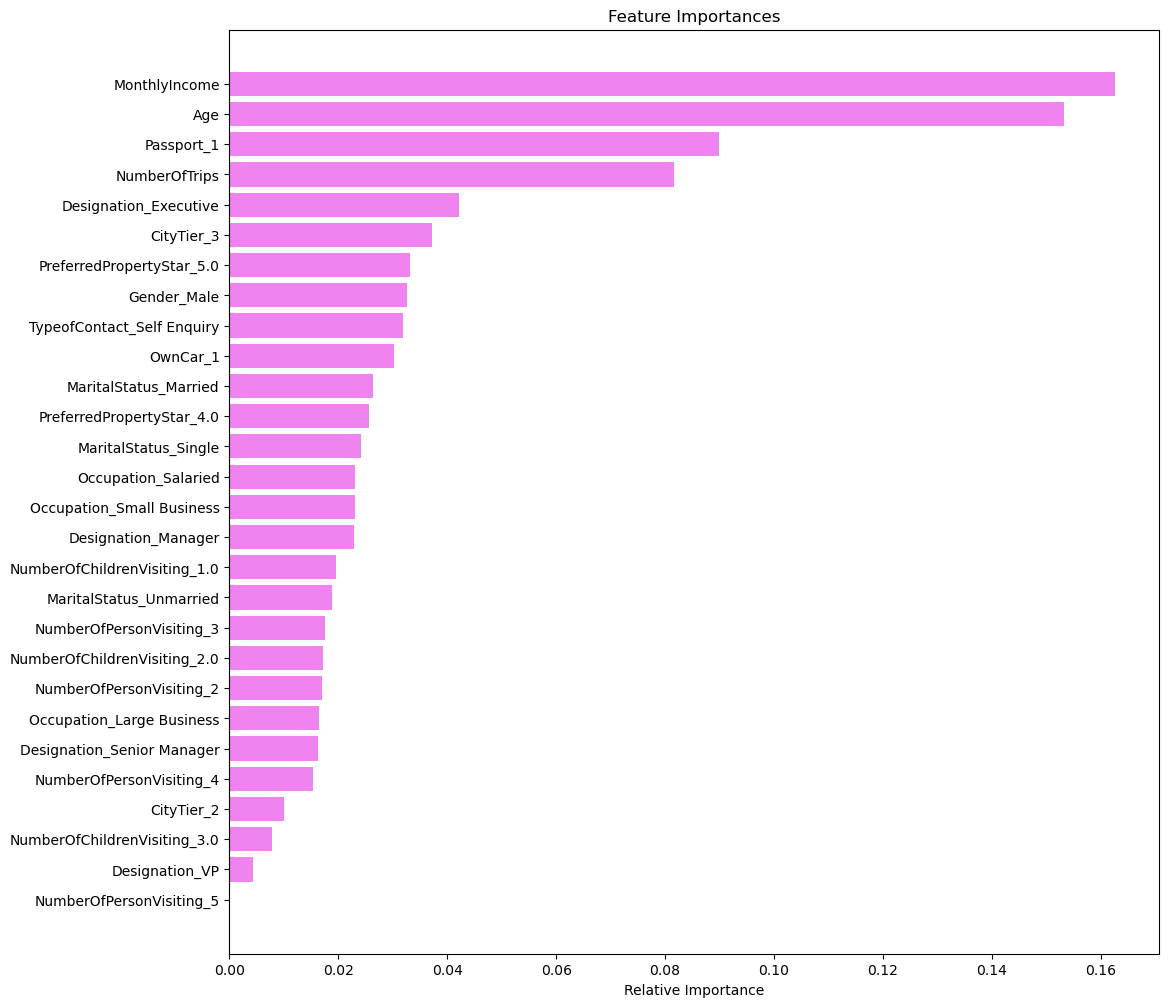

<IPython.core.display.Javascript object>

In [87]:
# plot a horizontal bar graph
importances = rfcwt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

1. There is no improvement by adding weights to the Random Forest classifier.
2. MonthlyIncome and Age are still the most important variables.

### Hypertuned Random Forest Classifier

In [88]:
# random forest classifier with weights
rfc1 = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

# grid of parameters to choose from
parameters = {"n_estimators": np.arange(110,251,501),
              "min_samples_leaf": np.arange(1,6,1),
              "max_features":["log2",0.7,0.9,"auto"],
              "max_samples": np.arange(0.3, 0.7, None),
             }

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(rfc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
rfcht = grid_obj.best_estimator_

# fit the best algorithm to the data.
rfcht.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, max_features='log2',
                       max_samples=0.3, min_samples_leaf=4, n_estimators=110,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [89]:
# check the scores on Training and Testing Datasets
rfcht_score = get_metrics_score(rfcht)

Accuracy on training set :  0.8667056416252558
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.7236024844720497
Recall on test set :  0.5942028985507246
Precision on training set :  0.6263440860215054
Precision on test set :  0.6074074074074074
F1 on training set :  0.6714697406340057
F1 on test set :  0.6007326007326007


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

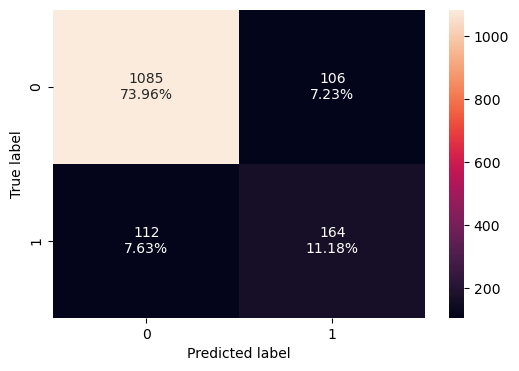

<IPython.core.display.Javascript object>

In [90]:
# use draw_matrix function
draw_matrix(rfcht, X_test, y_test)

#### Check the important variables

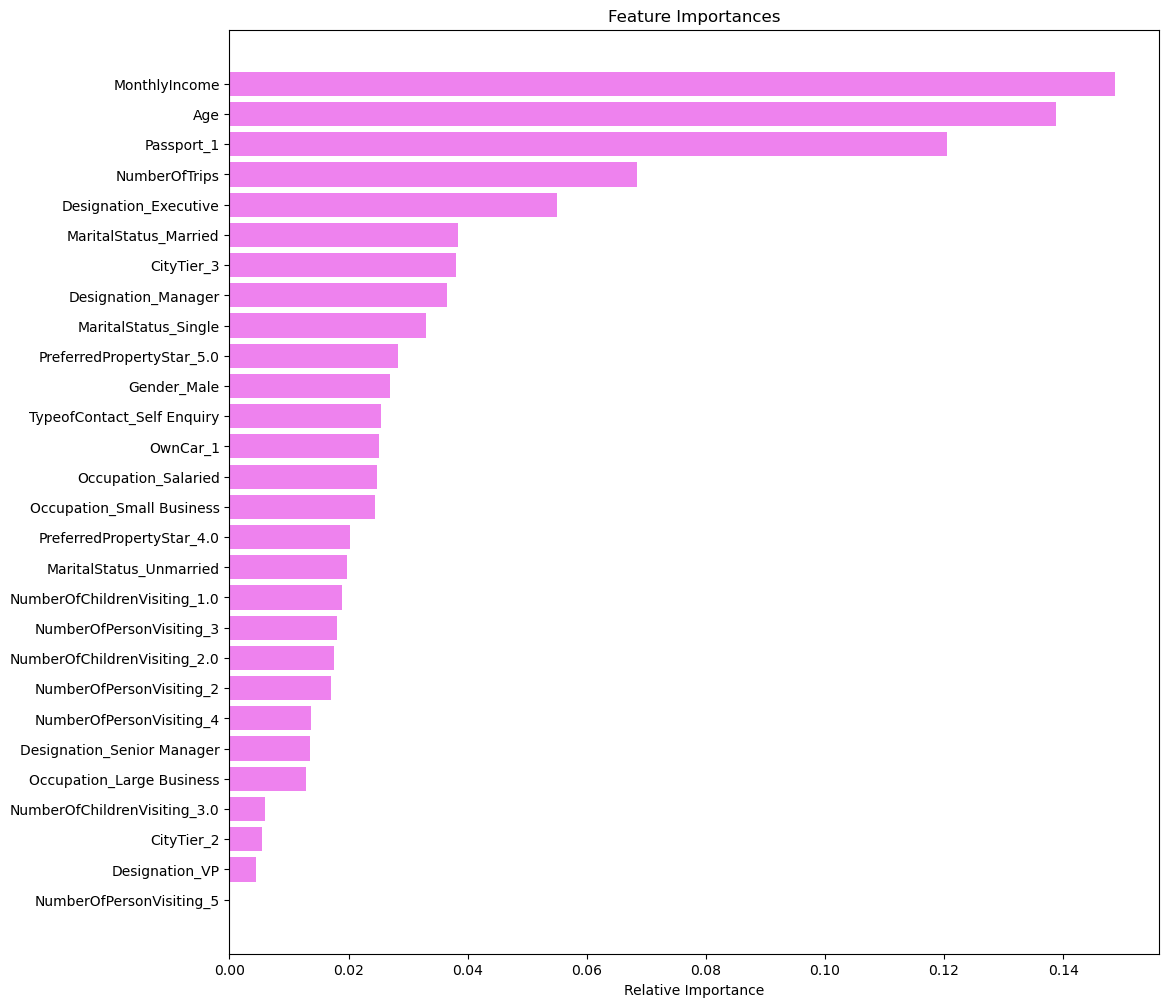

<IPython.core.display.Javascript object>

In [91]:
# plot a horizontal bar graph
importances = rfcht.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

1. The metrics have dropped after hypertuning.
2. The model is not overfitting.
2. F1 Score has reduced, but the score is comparable between training and testing sets.
3. The most importance features for this model are:
     - MonthlyIncome
     - Age
     - Passport_1(Customers with Passport)    
4. This model gives 85% accuracy rate, which is quite good despite the imbalance in data.

### ADA Boost Classifier

In [92]:
# adaboost classifier
abc = AdaBoostClassifier(random_state=1)

# fit the model on training set
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [93]:
# check the scores on Training and Testing Datasets
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.8351359251680796
Accuracy on test set :  0.8438991138377642
Recall on training set :  0.25
Recall on test set :  0.27898550724637683
Precision on training set :  0.6652892561983471
Precision on test set :  0.719626168224299
F1 on training set :  0.36343115124153497
F1 on test set :  0.402088772845953


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

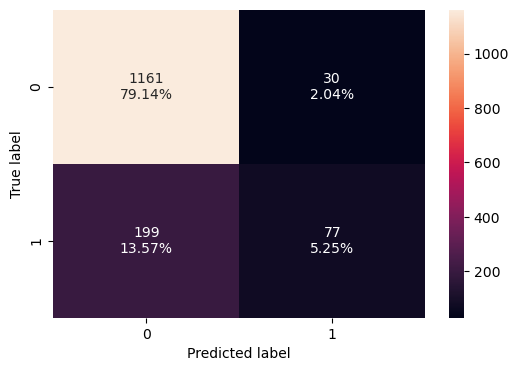

<IPython.core.display.Javascript object>

In [94]:
# use draw_matrix function
draw_matrix(abc, X_test, y_test)

**Observations:**

1. The metrics for ADA boost model is close and comparable for train and test set.
2. F1 Score is too loa.
3. The model identifies 5.25% out of 13% true positives.

### Hypertuned ADA Boost Classifier

In [95]:
# choose the type of classifier. 
abc1 = AdaBoostClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    #let"s try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1,random_state=1),DecisionTreeClassifier(max_depth=2,random_state=1),
                      DecisionTreeClassifier(max_depth=3,random_state=1)],
    "n_estimators": np.arange(10,60,10),
    "learning_rate": [0.05,0.15,0.45,0.75]
}

# type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(abc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
abcht = grid_obj.best_estimator_

# fit the best algorithm to the data.
abcht.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.75, random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [96]:
# check the scores on Training and Testing Datasets
abcht_score = get_metrics_score(abcht)

Accuracy on training set :  0.9239988307512423
Accuracy on test set :  0.8575323790047716
Recall on training set :  0.6708074534161491
Recall on test set :  0.45652173913043476
Precision on training set :  0.9
Precision on test set :  0.6810810810810811
F1 on training set :  0.7686832740213524
F1 on test set :  0.5466377440347071


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

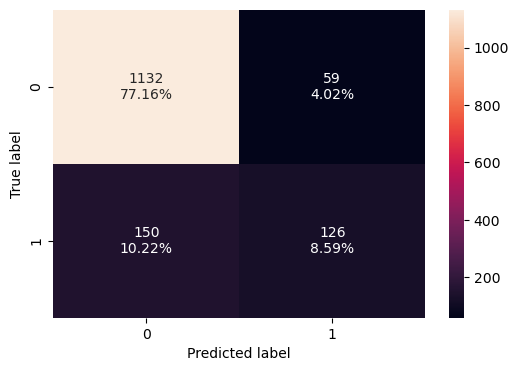

<IPython.core.display.Javascript object>

In [97]:
# use draw_matrix function
draw_matrix(abcht, X_test, y_test)

**Observations:**

1. The hypertuning has improved the scores on ADA Boost.
2. Model is able to identify 8.59% of true positives.

### Gradient Boost Classifier

In [98]:
# gradient boost classifier
gbc = GradientBoostingClassifier(random_state=1)

# fit the model on training set
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [99]:
# check the scores on Training and Testing Datasets
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.8786904413914061
Accuracy on test set :  0.8711656441717791
Recall on training set :  0.4332298136645963
Recall on test set :  0.3695652173913043
Precision on training set :  0.8480243161094225
Precision on test set :  0.8717948717948718
F1 on training set :  0.5734840698869477
F1 on test set :  0.5190839694656488


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

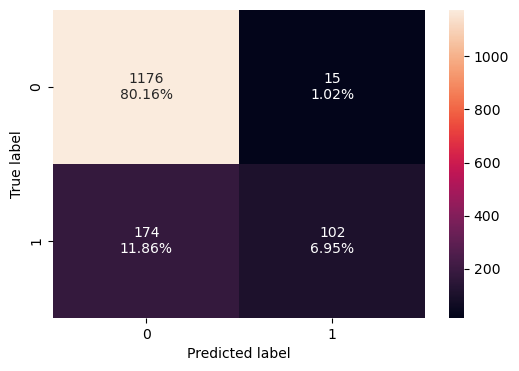

<IPython.core.display.Javascript object>

In [100]:
# use draw_matrix function
draw_matrix(gbc, X_test, y_test)

**Observations:**

1. The metric are comparable between training and testing set.
2. F1 Score is better than default ADA Boost.
3. Model is able to identify 6.95% out of 13% true positives.

### Gradient Boost with ADA Boost Classifier

In [101]:
# gradientboostclassifier with adaboost as init model
gbcab = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# fit the model on training set
gbcab.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

#### Check the scores

In [102]:
# check the scores on Training and Testing Datasets
gbcab_score = get_metrics_score(gbcab)

Accuracy on training set :  0.8778135048231511
Accuracy on test set :  0.8670756646216768
Recall on training set :  0.42080745341614906
Recall on test set :  0.36231884057971014
Precision on training set :  0.8575949367088608
Precision on test set :  0.8403361344537815
F1 on training set :  0.5645833333333333
F1 on test set :  0.5063291139240507


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

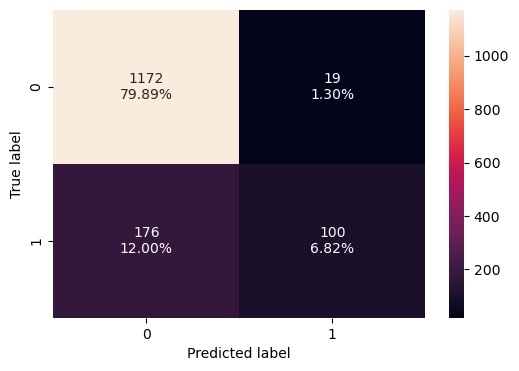

<IPython.core.display.Javascript object>

In [103]:
# use draw_matrix function
draw_matrix(gbcab, X_test, y_test)

**Observations:**

1. F1 Score has reduced.
2. The results are still comparable between training and testing sets.

### Hypertuned Gradient Boost Classifier

In [104]:
# Choose the type of classifier. 
gbcab1 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,5),
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.6,0.7,0.8],
    "learning_rate": [0.05,0.15,0.5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbcab1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbcht = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbcht.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.5, max_features=0.6, n_estimators=50,
                           random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

#### Check the scores

In [105]:
# check the scores on Training and Testing Datasets
gbcht_score = get_metrics_score(gbcht)

Accuracy on training set :  0.9079216603332358
Accuracy on test set :  0.8629856850715747
Recall on training set :  0.5900621118012422
Recall on test set :  0.4166666666666667
Precision on training set :  0.8816705336426914
Precision on test set :  0.7419354838709677
F1 on training set :  0.7069767441860465
F1 on test set :  0.5336426914153132


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

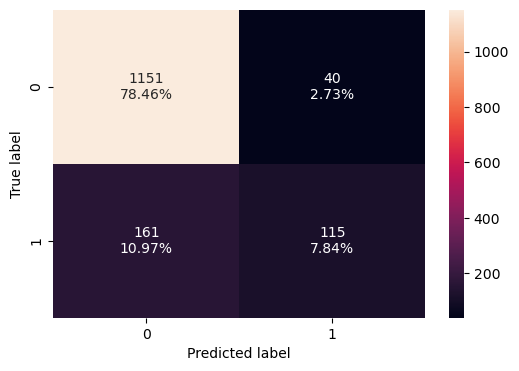

<IPython.core.display.Javascript object>

In [106]:
# use draw_matrix function
draw_matrix(gbcht, X_test, y_test)

**Observations:**

1. F1 Score has improved on both training and testing sets.
2. Model is able to identify 7.84% of true positives. 

### XG Boost Classifier (Extreme Gradient Boost Classifier)

In [107]:
# xgbclassifier with eval_metric="logloss"
xgbc = XGBClassifier(random_state=1, eval_metric="logloss")

# fit the model on training set
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Check the scores

In [108]:
# check the scores on Training and Testing Datasets
xgbc_score = get_metrics_score(xgbc)

Accuracy on training set :  0.9961999415375621
Accuracy on test set :  0.8970688479890934
Recall on training set :  0.9798136645962733
Recall on test set :  0.5688405797101449
Precision on training set :  1.0
Precision on test set :  0.8306878306878307
F1 on training set :  0.9898039215686275
F1 on test set :  0.675268817204301


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

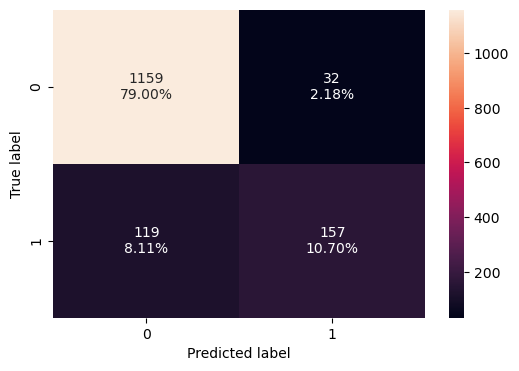

<IPython.core.display.Javascript object>

In [109]:
# use draw_matrix function
draw_matrix(xgbc, X_test, y_test)

**Observations:**

1. The model is over fitting on training set.
2. F1 Score has improved over earlier models.
3. The model is able to identify 10.70% true positives.

### Hypertuned XG Boost Classifier

In [110]:
# choose the classifier
xgbc1 = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
    "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgbc1, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgbcht = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgbcht.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.55, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Check the scores

In [111]:
# check the scores on Training and Testing Datasets
xgbcht_score = get_metrics_score(xgbcht)

Accuracy on training set :  0.9926921952645426
Accuracy on test set :  0.8704839809134287
Recall on training set :  0.9627329192546584
Recall on test set :  0.4963768115942029
Precision on training set :  0.998389694041868
Precision on test set :  0.7287234042553191
F1 on training set :  0.9802371541501975
F1 on test set :  0.5905172413793103


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

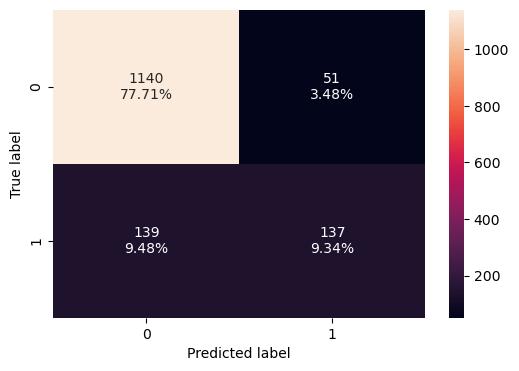

<IPython.core.display.Javascript object>

In [112]:
# use draw_matrix function
draw_matrix(xgbcht, X_test, y_test)

**Observations:**

1. Hypertuning has reduced the metrics.
2. Model is able to identify 9.34% true positive.
3. Model still tends to overfit.

### Stacking Classifier

We can Random forest classifier, Gradient boost classifier and Decision Tree. These three models have least comparable overfitting issue and are good performance metrics.

In [113]:
# define the estimators for the model
estimators = [("Random Forest",rfcht),("ADA Boosting",abcht),("Decision Tree",dtc)]

# define the final estimator
final_estimator = xgbcht

# choose the classifier
sc= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

# train the model on training set
sc.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       max_features='log2',
                                                       max_samples=0.3,
                                                       min_samples_leaf=4,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('ADA Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.75,
                                                   random_state=1)),
                             

<IPython.core.display.Javascript object>

#### Check the scores

In [114]:
# check the scores on Training and Testing Datasets
sc_score = get_metrics_score(sc)

Accuracy on training set :  0.9394913767904122
Accuracy on test set :  0.8507157464212679
Recall on training set :  0.7717391304347826
Recall on test set :  0.4601449275362319
Precision on training set :  0.8922800718132855
Precision on test set :  0.6446700507614214
F1 on training set :  0.8276436303080766
F1 on test set :  0.5369978858350951


<IPython.core.display.Javascript object>

#### Draw the confusion matrix

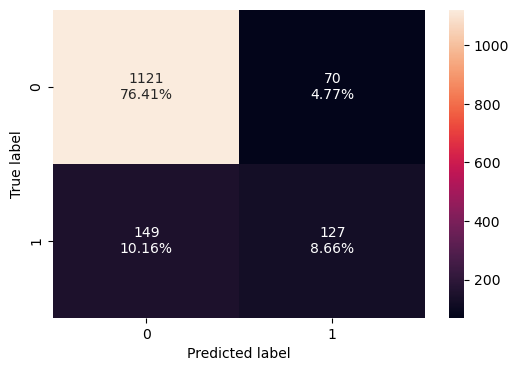

<IPython.core.display.Javascript object>

In [115]:
# use draw_matrix function
draw_matrix(sc, X_test, y_test)

**Observations:**

1. F1 score is reduced to 0.54.
2. The model is not overfitting on testing set.
3. Accuracy of the model is 0.85.

## Compare all models

In [116]:
# defining list of models
models = [dtc, dtcht, bgc, bgclr, bgcdt, bgcht, rfc, rfcwt, rfcht, abc, abcht, gbc, gbcab, gbcht, xgbc, xgbcht, sc]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

# create dataframe
comparison_frame = pd.DataFrame({"Model":["Decision Tree", "Decision Tree - Tuned", "Bagging", "Bagging - Tuned", "Bagging - Linear Regression",
                                          "Bagging - Decision Tree", "Random Forest", "Random Forest - Weights",
                                          "Random Forest - Tuned", "ADA Boost", "ADA Boost - Tuned", "Gradient Boost", 
                                          "Gradient Boost - ADA Boost", "Gradient Boost - Tuned", "XG boost", "XG Boost - Tuned", "Stacking"], 
                                          "Accuracy - Train": acc_train, "Accuracy - Test": acc_test,
                                          "Recall - Train": recall_train,"Recall - Test": recall_test,
                                          "Precision - Train": precision_train,"Precision - Test" :precision_test,
                                          "F1 - Test": f1_train,"F1 - Test": f1_test}) 
comparison_frame

,Model,Accuracy - Train,Accuracy - Test,Recall - Train,Recall - Test,Precision - Train,Precision - Test,F1 - Test
0,Decision Tree,1.00,0.85,1.00,0.60,1.00,0.61,0.60
1,Decision Tree - Tuned,0.74,0.73,0.74,0.70,0.40,0.38,0.49
2,Bagging,0.99,0.89,0.95,0.54,1.00,0.81,0.64
3,Bagging - Tuned,0.81,0.81,0.00,0.00,0.00,0.00,0.00
4,Bagging - Linear Regression,0.99,0.89,0.94,0.49,1.00,0.85,0.62
5,Bagging - Decision Tree,1.00,0.90,1.00,0.57,1.00,0.88,0.69
6,Random Forest,1.00,0.88,1.00,0.45,1.00,0.88,0.59
7,Random Forest - Weights,1.00,0.88,1.00,0.42,1.00,0.88,0.57
8,Random Forest - Tuned,0.87,0.85,0.72,0.59,0.63,0.61,0.60
9,ADA Boost,0.84,0.84,0.25,0.28,0.67,0.72,0.40


<IPython.core.display.Javascript object>

**Observations:**

1. Bagging with Decision Tree has the highest F1 Score but it is overfitting the data.
2. Despite having lower F1 Score, the Hypertuned Random Forest has more generalized metrics and does not seem to be over-fitting the data. Making it the best suited for future analysis.
3. Most of the models show comparable scores between training and testing sets.

## Conclusion

1. A Key missing variable is if the Product pitched was the same product that was bought. 
2. Basic and Deluxe are the most popular packages.
3. There was imbalance in data, as only 18% of customers bought any product. This must be fixed for future analysis.
4. NumberofChilden and NumberofPeoplevisiting does not seem to impact the performance of model a lot.
5. The company can run the model to achieve desired performance levels for new data, also to offer better packages to customers.
6. Young and single people are more likely to buy the offered packages. 
7. Age and Income have a correlation and we see that higher age groups and higher Monthly Income groups lean towards the expensive packages.


## Recommendations

1. The marketing team can curate the individual packages to the specific business designation
2. The marketing team can create product and customer segment specific sale pitch to reduce the DurationOfPitch.
3. The **WELLNESS TOURISM PACKAGE**  should be curated considering the features of existing packages that customers have purchased.
4. The company can run various campaigns and offers for customers with family to increase sales.
5. The data shows customers with passport has higher buying ratio and business can curate international packages for such customers.
6. Specific packages can be created for different income groups.
7. The data collection process can be enhanced to capture additional information like customer satisfaction post tour and data to correlate the product pitched to the product actually purchased by customers.

In [117]:
# Module : Ensemble Techniques
# Project: travel package predictions
# Submitted by : Ritesh Sharma
# Submission Date : 01 Oct 2021

<IPython.core.display.Javascript object>